# Análise exploratória dos dados do ENADE e 2019 
Este notebook será compartilhado entre membros do grupo MyClass, e posteriormente, enviado aos professores da disciplina de Projeto Interdisciplinar 3.


Este trabalho parte da hipótese de correlação entre atributos socioeconômicos e nota geral dos alunos. Segundo esse pressuposto, previamente serão selecionadas as variáveis de caráter social e econômico do Questionário do Estudante e outras fontes da prova do ENADE.

A variável target do estudo será a Nota Geral, que representa a média ponderada da Formação Geral, 25%, e Compotente Específico, 75%.


In [ ]:
# bibliotecas básicas para análise exploratória de dados 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Conectar ao drive, onde está o dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Dados](https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enade) do ENADE de 2019.

In [ ]:
# arquivo separado por ponto e vírgula

#Diretório onde está o dataset
dataset_diretory_2019 = '/content/drive/MyDrive/Dataset_projeto_lll/microdados_enade_2019.csv' 
Enade_2019 = pd.read_csv(dataset_diretory_2019,sep = ";")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (57,59) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Seleção de dados Enade
As colunas que pertencem ao escopo do projeto:
  - NU_IDADE  = Idade do participante
  - TP_SEXO = Sexo do participante
  - NT_GER = Nota bruta total da prova
  - QE_I01 = Estado civil
  - QE_I02 = Raça/cor
  - QE_I03 = Nacionalidade;
  - QE_I04 = Escolaridade do pai
  - QE_I05 = Escolaridade da mãe
  - QE_I06 = Com que participante mora
  - QE_I07 = Quantidade de pessoas que moram com participante
  - QE_I08 = renda da família
  - QE_I09 = Situação financeira;
  - QE_I10 = Situação de trabalho;
  - QE_I11 = Bolsa de estudo;
  - QE_I12 = Alguma bolsa permanência;
  - QE_I13 = Bolsa academica;
  - QE_I14 = Atividades exterir
  - QE_I15 = Ingresso por cota
  - QE_I16 = Estado que concluiu ensino médio
  - QE_I17 = Tipo de escola Ensino Médio
  - QE_I18 = Modalidade ensino médio
  - QE_I19 = Incentivar graduação
  - QE_I20 = algum grupo dificultou a passagem do curso;
  - QE_I21 = Alguem da familia cursou curso superior
  - QE_I22 = livros lidos no ano;
  - QE_I23 = horas por semana que estudou;
  - QE_I24 = Estudar idioma estrangeiro;
  - QE_I25 = motivo ter entrado no curso;
  - QE_I26 = Razão por ter entrado no curso


##Trocar nome das colunas

In [ ]:
Dataset_features = Enade_2019

In [ ]:
#Selecionar as colunas que serão utilizadas do dataset
Dataset_features = Dataset_features[[#"CO_GRUPO",
                                     "NT_GER","NU_IDADE","TP_SEXO","QE_I01","QE_I02","QE_I03",
                                          "QE_I04","QE_I05","QE_I06","QE_I07","QE_I08",
                                          "QE_I09","QE_I10","QE_I11","QE_I12","QE_I13","QE_I14","QE_I15",
                                          "QE_I16","QE_I17","QE_I18","QE_I19","QE_I20","QE_I21",
                                          "QE_I22","QE_I23","QE_I24","QE_I25","QE_I26"]]
#Troca do nome das colunas
Dataset_features.rename(columns={
  #"CO_GRUPO": "Curso_participante",
  "NU_IDADE"  : "Idade",
  "TP_SEXO" : "Sexo",
  "NT_GER" : "Nota",
  "QE_I01" : "Estado_civil",
  "QE_I02" : "Raça/cor",
  "QE_I03" : "Nacionalidade",
  "QE_I04" : "Escolaridade_pai",
  "QE_I05" : "Escolaridade_mae",
  "QE_I06" : "Com_quem_mora",
  "QE_I07" : "Qt_moradores_participante",
  "QE_I08" : "Renda_família",
  "QE_I09" : "Situação_financeira",
  "QE_I10" : "Situação_trabalho",
  "QE_I11" : "Bolsa_de_estudos",
  "QE_I12" : "Bolsa_permanência",
  "QE_I13" : "Bolsa_academica",
  "QE_I14" : "Atividade_exterior",
  "QE_I15" : "Ingresso_cota",
  "QE_I16" : "Estado_ensino_medio",
  "QE_I17" : "Tipo_ensino_medio",
  "QE_I18" : "Modalidade_ensino_medio",
  "QE_I19" : "Incentivou_graduação",
  "QE_I20" : "Grupo_dificuldade",
  "QE_I21" : "Familia_curso_superior",
  "QE_I22" : "Livros_lidos",
  "QE_I23" : "horas/semana estudadas",
  "QE_I24" : "Estudo_idioma_estrangeiro",
  "QE_I25" : "Motivo_curso",
  "QE_I26" : "Razao_instituicao"
},inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


##Retirar dados nulos

In [ ]:
#Transformar todas as variaveis que tem espaço em branco como Null
Dataset_features.replace(" ",np.NaN,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
Dataset_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433930 entries, 0 to 433929
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Nota                       390091 non-null  object 
 1   Idade                      433930 non-null  int64  
 2   Sexo                       433930 non-null  object 
 3   Estado_civil               407875 non-null  object 
 4   Raça/cor                   407874 non-null  object 
 5   Nacionalidade              407875 non-null  object 
 6   Escolaridade_pai           407876 non-null  object 
 7   Escolaridade_mae           407876 non-null  object 
 8   Com_quem_mora              407876 non-null  object 
 9   Qt_moradores_participante  407877 non-null  object 
 10  Renda_família              407873 non-null  object 
 11  Situação_financeira        407876 non-null  object 
 12  Situação_trabalho          407875 non-null  object 
 13  Bolsa_de_estudos           40

In [ ]:
#Target nulos
tamanho_dataset = Dataset_features.shape[0]
target_linhas_nulas,target_colunas_nulas = Dataset_features[Dataset_features["Nota"].isna()].shape
print(f"Número de linhas com target nulo: {target_linhas_nulas}")
print(f"Número de linhas dataset: {tamanho_dataset}")
print(f"Número de linhas sem as linhas com target nulo: {tamanho_dataset-target_linhas_nulas}")

Número de linhas com target nulo: 43839
Número de linhas dataset: 433930
Número de linhas sem as linhas com target nulo: 390091


In [ ]:
#Observação de linhas com valores NaN

dataset_target_tratado = Dataset_features[Dataset_features["Nota"].notna()]
carateristicas_nulas = dataset_target_tratado.drop(labels=["Nota","Idade","Sexo"],axis = 1)

linhas_colunas_null = dataset_target_tratado[dataset_target_tratado.isnull().any(axis=1)].shape[0]
linhas_tudo_null = carateristicas_nulas[carateristicas_nulas.isnull().all(axis=1)].shape[0]

print(f"Número de linhas com colunas NaN: {linhas_colunas_null}")
print(f"Número de linhas com todas as colunas NaN: {linhas_tudo_null}")

Número de linhas com colunas NaN: 681
Número de linhas com todas as colunas NaN: 628


In [ ]:
#Observação linhas com a nota igua a 0.
linhas_zero = Dataset_features[Dataset_features["Nota"] == "0"].shape[0]

print(f"Número de linhas com nota zero: {linhas_zero}")


Número de linhas com nota zero: 361


In [ ]:
# Com dados, foi decidido:
#   - Tirar todas as linhas com target nulo
#   - Tirar todas as linhas que tem alguma coluna NaN
#   - Tirar todas as linhas com target = "0", que pode ser considerado um outlier 

Dataset_features = Dataset_features.dropna()
Dataset_features = Dataset_features[Dataset_features["Nota"] != "0"]

In [ ]:
Dataset_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389050 entries, 0 to 433929
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Nota                       389050 non-null  object 
 1   Idade                      389050 non-null  int64  
 2   Sexo                       389050 non-null  object 
 3   Estado_civil               389050 non-null  object 
 4   Raça/cor                   389050 non-null  object 
 5   Nacionalidade              389050 non-null  object 
 6   Escolaridade_pai           389050 non-null  object 
 7   Escolaridade_mae           389050 non-null  object 
 8   Com_quem_mora              389050 non-null  object 
 9   Qt_moradores_participante  389050 non-null  object 
 10  Renda_família              389050 non-null  object 
 11  Situação_financeira        389050 non-null  object 
 12  Situação_trabalho          389050 non-null  object 
 13  Bolsa_de_estudos           38

##Mudar nome do domínio de cada coluna do dataset para variáveis mais clara

In [ ]:
# Mudar a nota bruta de uma string para float (substituição do "," para ".")
Dataset_features['Nota'] = Dataset_features['Nota'].apply(lambda x: float(str(x).replace(",",".")))

def Mudar_variaveis(nome_da_coluna,dicionario):
  global Dataset_features

  Dataset_features[nome_da_coluna].replace(dicionario,inplace = True)



#Mudar o nome das categorias da coluna Estado_cívil
Mudar_variaveis(
    "Estado_civil",
    {
      "A" : "Solteiro(a)",
      "B" : "Casado(a)",
      "C" : "Separado(a) judicialmente/divorciado(a)",
      "D" : "Viúvo(a)",
      "E" : "Outro(a)"
    })

#Mudar o nome das categorias da coluna Raça/cor
Mudar_variaveis(
    "Raça/cor",
    {
      "A" : "Branca",
      "B" : "Preta",
      "C" : "Amarela",
      "D" : "Parda",
      "E" : "Indígena",
      "F" : "Não quis declarar"
    })

#Mudar o nome das categorias da coluna Nacionalidade
Mudar_variaveis(
    "Nacionalidade",
    {
      "A" : "Brasileira",
      "B" : "Brasileira naturalizada",
      "C" : "Estrangeira"
    })

#Mudar o nome das categorias da coluna Escolaridade_pai
Mudar_variaveis(
    'Escolaridade_pai',
    {
      "A" : "Nenhuma",
      "B" : "Ensino Fundamental: 1º ao 5º ano(1º a 4º série)",
      "C" : "Ensino Fundamental: 6º ao 9º ano(5º a 8º série)",
      "D" : "Ensino Médio",
      "E" : "Ensino Superior - Graduação",
      "F" : "Pós-graduação"
    })

#Mudar o nome das categorias da coluna Escolaridade_mae
Mudar_variaveis(
    'Escolaridade_mae',
    {
      "A" : "Nenhuma",
      "B" : "Ensino Fundamental: 1º ao 5º ano(1º a 4º série)",
      "C" : "Ensino Fundamental: 6º ao 9º ano(5º a 8º série)",
      "D" : "Ensino Médio",
      "E" : "Ensino Superior - Graduação",
      "F" : "Pós-graduação"
    })

#Mudar o nome das categorias da coluna Com_quem_mora
Mudar_variaveis(
    'Com_quem_mora',
    {
      "A" : "Em casa ou apartamento, sozinho",
      "B" : "Em casa ou apartamento, com pais e/ou parentes",
      "C" : "Em casa ou apartamento, com cônjuge e/ou filhos",
      "D" : "Em casa ou apartamento, com outras pessoas (incluindo república)",
      "E" : "Em alojamento universitário da própria instituição",
      "F" : "Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)"
    })

#Mudar o nome das categorias da coluna Qt_moradores_participante
Mudar_variaveis(
    'Qt_moradores_participante',
    {
      "A" : "Nenhuma",
      "B" : "Uma",
      "C" : "Duas",
      "D" : "Três",
      "E" : "Quatro",
      "F" : "Cinco",
      "G" : "Seis",
      "H" : "Sete ou mais"
    })

#Mudar o nome das categorias da coluna Renda_família
Mudar_variaveis(
    'Renda_família',
    {
      "A" : "Até 1.5 salário mínimo",
      "B" : "De 1.5 a 3 salários mínimos",
      "C" : "De 3 a 4.5 salários mínimos",
      "D" : "De 4.5 a 6 salários mínimos",
      "E" : "De 6 a 10 salários mínimos",
      "F" : "De 10 a 30 salários mínimos",
      "G" : "Acima de 30 salários mínimos",
    })

#Mudar o nome das categorias da coluna Situação_financeira
Mudar_variaveis(
    'Situação_financeira',
    {
      "A" : "Não tem renda, gastos financiados por programas governamentais",
      "B" : "Não tem renda, gastos financiados pela família ou por outra pessoa",
      "C" : "Tem renda, mas recebe ajuda da família ou de outra pessoa para financiar os gastos",
      "D" : "Tem renda e não precisa de ajuda para financiar os gastos",
      "E" : "Tem renda e contribue com sustento da família",
      "F" : "Principal sustento da família"
    })

#Mudar o nome das categorias da coluna Situação_trabalho
Mudar_variaveis(
    'Situação_trabalho',
    {
      "A" : "Não está trabalhando",
      "B" : "Trabalha eventualmente",
      "C" : "Trabalho até 20 horas semanais",
      "D" : "Trabalho de 21 a 39 horas semanais",
      "E" : "Trabalho 40 horas semanais ou mais"
    })

#Mudar o nome das categorias da coluna Bolsa_de_estudos
Mudar_variaveis(
    "Bolsa_de_estudos",
    {
      "A" : "Nenhum, curso gratuito",
      "B" : "Nenhum, porém curso não gratuito",
      "C" : "ProUni integral",
      "D" : "ProUni parcial, apenas",
      "E" : "FIES, apenas",
      "F" : "Prouni parcial e FIES",
      "G" : "Bolsa oferecida por governo",
      "H" : "Bolsa oferecida pela instituição",
      "I" : "Bolsa oferecida por outra entidade",
      "J" : "Finaciamento da instituição",
      "K" : "Finaciamento bancário"
    })

#Mudar o nome das categorias da coluna Bolsa_permanência
Mudar_variaveis(
    'Bolsa_permanência',
    {
      "A" : "Nenhum",
      "B" : "Auxílio Moradia",
      "C" : "Auxílio alimentação",
      "D" : "Auxílio moradia e alimentação",
      "E" : "Auxílio Permanência",
      "F" : "Outro tipo de auxílio"
    })

#Mudar o nome das categorias da coluna Bolsa_permanência
Mudar_variaveis(
    'Bolsa_academica',
    {
      "A" : "Nenhum",
      "B" : "Bolsa de iniação científica",
      "C" : "Bolsa de extensão",
      "D" : "Bolsa de monitoria/tutoria",
      "E" : "Bolsa PET",
      "F" : "Outro tipo de bolsa acadêmica"
    })

#Mudar o nome das categorias da coluna Atividade_exterior
Mudar_variaveis(
    "Atividade_exterior",
    {
      "A" : "Não",
      "B" : "Programa Ciência sem fronteiras",
      "C" : "Programa de intercâmbio financiado pelo governo Federal",
      "D" : "Programa de intercâmbio financiado pelo governo Estadual",
      "E" : "Programa de intercâmbio da instituição",
      "F" : "Outro intercâmbio não institucional"
    })

#Mudar o nome das categorias da coluna Ingresso_cota
Mudar_variaveis(
    'Ingresso_cota',
    {
      "A" : "Nenhuma",
      "B" : "Por critério étnico-racial",
      "C" : "Por critério de renda",
      "D" : "Por ter estudado em escola pública ou em particular com bolsa de estudos",
      "E" : "Por sistema que combina dois ou mais critéios anteriores",
      "F" : "Por sistema diferentes dos anteriores"
    })

#Mudar o nome das categorias da coluna Estado_ensino_medio
Mudar_variaveis(
    "Estado_ensino_medio",
    {
      11 : "Norte",
      12 : "Norte",
      13 : "Norte",
      14 : "Norte",
      15 : "Norte",
      16 : "Norte",
      17 : "Norte",
      21 : "Nordeste",
      22 : "Nordeste",
      23 : "Nordeste",
      24 : "Nordeste",
      25 : "Nordeste",
      26 : "Nordeste",
      27 : "Nordeste",
      28 : "Nordeste",
      29 : "Nordeste",
      31 : "Sudeste",
      32 : "Sudeste",
      33 : "Sudeste",
      35 : "Sudeste",
      41 : "Sul",
      42 : "Sul",
      43 : "Sul",
      50 : "Centro-Oeste",
      51 : "Centro-Oeste",
      52 : "Centro-Oeste",
      53 : "Centro-Oeste",
      99 : "Não se aplica",
    })

#Mudar o nome das categorias da coluna Tipo_ensino_medio
Mudar_variaveis(
    "Tipo_ensino_medio",
    {
      "A" : "Todo em escola pública",
      "B" : "Todo em escola privada(particular)",
      "C" : "Todo no exterior",
      "D" : "A maior parte na escola pública",
      "E" : "A maior parte em escola privada(particular)",
      "F" : "Parte no Brasil parte no exterior"
    })

#Mudar o nome das categorias da coluna Modalidade_ensino_medio
Mudar_variaveis(
    "Modalidade_ensino_medio",
    {
      "A" : "Ensino médio tradicional",
      "B" : "Profissionalizante técnico",
      "C" : "Profissionalizante magistério",
      "D" : "Educação de Jovens e Adultos e/ou supletivo",
      "E" : "Outra modalidade"
    })

#Mudar o nome das categorias da coluna Incentivou_graduação
Mudar_variaveis(
    "Incentivou_graduação",
    {
      "A" : "Ninguém",
      "B" : "Pais",
      "C" : "Outro membros da família",
      "D" : "Professores",
      "E" : "Líder ou representante religioso",
      "F" : "Colegas/Amigos",
      "G" : "Outras pessoas"
    })

#Mudar o nome das categorias da coluna Grupo_dificuldade
Mudar_variaveis(
    'Grupo_dificuldade',
    {
      "A" : "Não teve dificuldade",
      "B" : "Não recebeu apoio para enfrentar dificuldades",
      "C" : "Pais",
      "D" : "Avós",
      "E" : "Irmãos,primos ou tios",
      "F" : "Líder ou representante religioso",
      "G" : "Colegas de curso ou amigos",
      "H" : "Professores do curso",
      "I" : "Profissionais do serviço de apoio ao estudante da IES",
      "J" : "Colegas de trabalho",
      "K" : "Outro grupo"
    })

#Mudar o nome das categorias da coluna Familia_curso_superior
Mudar_variaveis(
    "Familia_curso_superior",
    {
      "A" : "Sim",
      "B" : "Não",
    })

#Mudar o nome das categorias da coluna Livro_lidos
Mudar_variaveis(
    'Livros_lidos',
    {
      "A" : "Nenhum",
      "B" : "Um ou dois",
      "C" : "De três a cinco",
      "D" : "De seis a oito",
      "E" : "Mais de oito"
    })

#Mudar o nome das categorias da coluna hora/semana estudadas
Mudar_variaveis(
    'horas/semana estudadas',
    {
      "A" : "Nenhuma, apenas assistiu as aulas",
      "B" : "De uma a três",
      "C" : "De quatro a sete",
      "D" : "De oito a doze",
      "E" : "Mais de Doze"
    })

#Mudar o nome das categorias da coluna Estudo_idioma_estrangeiro
Mudar_variaveis(
    "Estudo_idioma_estrangeiro",
    {
      "A" : "Modalidade presencial",
      "B" : "Modalidade semipresencial",
      "C" : "Modalidade presencial e semipresencial",
      "D" : "Modalidade a distância",
      "E" : "Não"
    })

#Mudar o nome das categorias da coluna Motivo_curso
Mudar_variaveis(
    'Motivo_curso',
    {
      "A" : "Inserção no mercado de trabalho",
      "B" : "Influência familiar",
      "C" : "Valorização profissional",
      "D" : "Prestígio Social",
      "E" : "Vocação",
      "F" : "Oferecido na modalidade a distância",
      "G" : "Baixa concorrência para ingresso",
      "H" : "Outro motivo"
    })

#Mudar o nome das categorias da coluna Razao_instituicao
Mudar_variaveis(
    "Razao_instituicao",
    {
      "A" : "Gratuidade",
      "B" : "Preço da mensalidade",
      "C" : "Proximidade da minha residência",
      "D" : "Proximidade do meu trabalho",
      "E" : "Facilidade de acesso",
      "F" : "Qualidade/reputação",
      "G" : "Foi a única onde tive aprovação",
      "H" : "Possibilidade de ter bolsa de estudo",
      "I" : "Outro motivo"
    })

##Visualização do Dataset

In [ ]:
# Visualização das cinco linhas da relação.

Dataset_features.head(5)

,Nota,Idade,Sexo,Estado_civil,Raça/cor,Nacionalidade,Escolaridade_pai,Escolaridade_mae,Com_quem_mora,Qt_moradores_participante,Renda_família,Situação_financeira,Situação_trabalho,Bolsa_de_estudos,Bolsa_permanência,Bolsa_academica,Atividade_exterior,Ingresso_cota,Estado_ensino_medio,Tipo_ensino_medio,Modalidade_ensino_medio,Incentivou_graduação,Grupo_dificuldade,Familia_curso_superior,Livros_lidos,horas/semana estudadas,Estudo_idioma_estrangeiro,Motivo_curso,Razao_instituicao
0,51.9,27,M,Outro(a),Amarela,Brasileira,Ensino Médio,Ensino Superior - Graduação,"Em casa ou apartamento, com cônjuge e/ou filhos",Três,De 1.5 a 3 salários mínimos,"Tem renda, mas recebe ajuda da família ou de o...",Não está trabalhando,"Nenhum, curso gratuito",Nenhum,Nenhum,Não,Nenhuma,Sudeste,Todo em escola privada(particular),Ensino médio tradicional,Pais,Colegas de curso ou amigos,Sim,Um ou dois,De oito a doze,Modalidade presencial,Vocação,Proximidade da minha residência
1,54.2,26,M,Solteiro(a),Branca,Brasileira,Ensino Superior - Graduação,Ensino Médio,"Em casa ou apartamento, com pais e/ou parentes",Uma,De 6 a 10 salários mínimos,"Tem renda, mas recebe ajuda da família ou de o...",Não está trabalhando,"Nenhum, curso gratuito",Nenhum,Nenhum,Não,Nenhuma,Centro-Oeste,Todo em escola privada(particular),Ensino médio tradicional,Ninguém,Pais,Sim,Um ou dois,De oito a doze,Modalidade presencial e semipresencial,Vocação,Proximidade da minha residência
3,42.1,24,M,Solteiro(a),Parda,Brasileira,Pós-graduação,Pós-graduação,"Em casa ou apartamento, com pais e/ou parentes",Duas,De 6 a 10 salários mínimos,"Não tem renda, gastos financiados pela família...",Não está trabalhando,"Nenhum, curso gratuito",Nenhum,Nenhum,Não,Nenhuma,Centro-Oeste,Todo em escola privada(particular),Ensino médio tradicional,Professores,Colegas de curso ou amigos,Sim,Nenhum,De oito a doze,Modalidade presencial,Valorização profissional,Qualidade/reputação
5,49.3,26,M,Solteiro(a),Branca,Brasileira,Ensino Superior - Graduação,Ensino Superior - Graduação,"Em casa ou apartamento, com outras pessoas (in...",Nenhuma,De 3 a 4.5 salários mínimos,"Tem renda, mas recebe ajuda da família ou de o...",Trabalho de 21 a 39 horas semanais,"Nenhum, curso gratuito",Nenhum,Nenhum,Não,Nenhuma,Sudeste,Todo em escola privada(particular),Ensino médio tradicional,Pais,Professores do curso,Sim,De três a cinco,Mais de Doze,Não,Valorização profissional,Facilidade de acesso
6,49.6,24,M,Solteiro(a),Branca,Brasileira,Ensino Superior - Graduação,Ensino Superior - Graduação,"Em casa ou apartamento, com pais e/ou parentes",Uma,De 6 a 10 salários mínimos,"Não tem renda, gastos financiados pela família...",Não está trabalhando,"Nenhum, curso gratuito",Nenhum,Nenhum,Não,Nenhuma,Centro-Oeste,Todo em escola privada(particular),Ensino médio tradicional,Pais,"Irmãos,primos ou tios",Sim,Um ou dois,De quatro a sete,Modalidade presencial,Influência familiar,Gratuidade


#ANALISE DE DADOS DO ENADE

##Distribuição de idades dos participantes Enade 2019

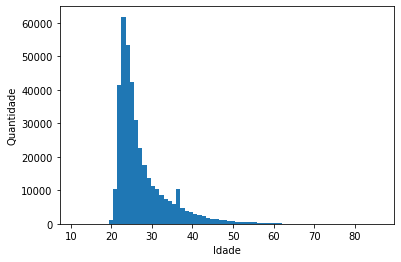

Números de participantes entres 20 a 30 anos: 78.87%


In [ ]:
plt.hist(Dataset_features["Idade"], bins = 72)
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.show()
total_participante = len(Dataset_features)

participante_entre_20_30 = Dataset_features[(Dataset_features['Idade'] >= 20) & (Dataset_features["Idade"] <= 30)]
print("Números de participantes entres 20 a 30 anos: {:2.2%}".format(len(participante_entre_20_30)/ total_participante))

Percebe-se no gráfico que dentro dos participantes do Enade 2019 77,49% está entre a faixa etária entre 20 e 30 anos

##ECDF Idades


Números de participantes menores ou igual a 30 anos: 78.89%


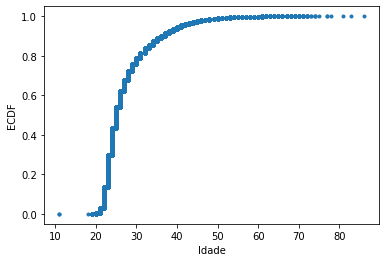

In [ ]:
x = np.sort(Dataset_features["Idade"])
n = len(Dataset_features)
y = np.arange(1,n+1)/n
plt.xlabel("Idade")
plt.ylabel("ECDF")

participante_abaixo_30 = Dataset_features[(Dataset_features["Idade"] <= 30)]
print("Números de participantes menores ou igual a 30 anos: {:2.2%}".format(len(participante_abaixo_30)/ total_participante))
plt.plot(x,y,marker = ".",linestyle = "none")

Número de participantes até 40 anos chega a mais de 90%

##Analise a média de nota com a idade


Nota média de cada idade


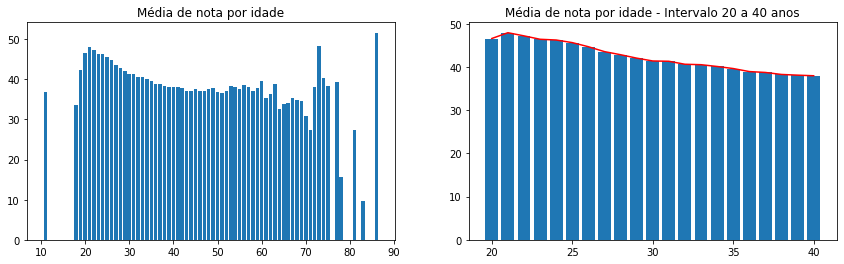

In [ ]:
#Distribuição de idade e nota
Notas_idade = Dataset_features[["Nota","Idade"]]
#Distribuição de idade nota no intervalo de 20 à 40 anos
Nota_idade_decaimento = Notas_idade[(Notas_idade["Idade"]>= 20) & (Notas_idade["Idade"]<=40)]

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title("Média de nota por idade")
ax2.set_title("Média de nota por idade - Intervalo 20 a 40 anos")
plt.subplots_adjust(right = 2)

Nota_media_por_idade = Notas_idade.groupby(by = ["Idade"],as_index = False).mean()
Nota_media_intervalo20a40 = Nota_idade_decaimento.groupby(by = ["Idade"],as_index = False).mean()


print("Nota média de cada idade")
ax1.bar(Nota_media_por_idade["Idade"],Nota_media_por_idade["Nota"])
ax2.bar(Nota_media_intervalo20a40["Idade"],Nota_media_intervalo20a40["Nota"])
ax2.plot(Nota_media_intervalo20a40["Idade"],Nota_media_intervalo20a40["Nota"],color = 'red')


# Nota-se que tem um pico e media aos 20 anos mais ou menos logo 
# após começa diminui até chega aos 40, onde começa estabilizar

Nota-se que a nota chega a um pico aos 21 anos, logo após tem uma descrescimento da nota por idade. Nota-se que tem uma nota muito alta com idade superior aos 70, o motivo disso pode ser algum outlier

##Média de nota em relação ao sexo

Porcentagem de homens: 44.93%
Porcentagem de mulheres: 55.07%


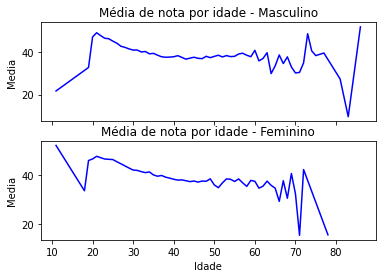

In [ ]:
fig, (ax1,ax2) = plt.subplots(2,sharex = True)

Homem_media = Dataset_features[Dataset_features["Sexo"] == "M"].groupby(by = ["Idade"],as_index = False).mean()
Mulher_media = Dataset_features[Dataset_features["Sexo"] == "F"].groupby(by = ["Idade"],as_index = False).mean()

ax1.set(ylabel = "Media")
ax2.set(xlabel = "Idade",ylabel = "Media")
ax1.set_title("Média de nota por idade - Masculino")
ax2.set_title("Média de nota por idade - Feminino")
ax1.plot(Homem_media["Idade"],Homem_media["Nota"],color = "blue")
ax2.plot(Mulher_media["Idade"],Mulher_media["Nota"],color = "blue")


n_mulheres = len(Dataset_features[Dataset_features["Sexo"] == "F"])
n_homem = len(Dataset_features[Dataset_features["Sexo"] == "M"])

print("Porcentagem de homens: {:2.2%}".format(n_homem/total_participante))
print("Porcentagem de mulheres: {:2.2%}".format(n_mulheres/total_participante))
#Aparentemente não tem nenhuma relação de diferencie a nota em relação ao sexo

Percebe-se que tanto homem como mulher tem um decaimento logo após passar dos 20 anos. 

##Função para dados agrupados (2 dados)

In [ ]:
def gerar_grafico_mean(colunas,target,graph_n):
  """
    Essa função funciona para ver relação entre duas variaveis
  """

  global Dataset_features
  
  #Juntar as duas colunas para fazer o filtro de colunas
  info_data = colunas + target

  data = Dataset_features[info_data]
  to_remove = data.loc[(data[colunas[0]] == " ") |
                            (data[colunas[1]] == " ")]
  data = data.drop(to_remove.index)

  #Criar os subplots
  fig, axs = plt.subplots(graph_n[0],graph_n[1])
  #Rotação nas labels do eixo x
  fig.autofmt_xdate(rotation=45)

  plt.subplots_adjust(top= 1.5,right = 2)

  # Ver as variaveis sozinhas
  for column_position in range(len(target)):
    
    #Agrupar por 
    data_media = data.groupby(by = [colunas[column_position]],as_index = False).mean().sort_values(target)

    axs[0][column_position].set_title(f"Media de nota por {colunas[column_position]}")
    axs[1][column_position].set_title(f"Media de Idade por {colunas[column_position]}")

    axs[0][column_position].bar(data_media[colunas[column_position]],data_media[target[0]])
    axs[1][column_position].bar(data_media[colunas[column_position]],data_media[target[1]])

    print(data_media)

  join_values = data.groupby(by = colunas,as_index = False).mean().sort_values(["Nota","Idade"])
  x_label = colunas[0] + " e " + colunas[1]
  join_values[x_label] = join_values[colunas[0]] +" e "+ join_values[colunas[1]]
  fig, [ax1,ax2] = plt.subplots(2)
  fig.autofmt_xdate(rotation=90)
  plt.subplots_adjust(top= 1.5,right = 2)

  #Mudar nome do titulo
  ax1.set_title(f"Média de nota entre {colunas[0]} e {colunas[1]}")
  ax2.set_title(f"Média de idade entre {colunas[0]} e {colunas[1]}")

  #Indicar as coordenadas
  ax1.bar(join_values[x_label],join_values[target[0]])
  ax2.bar(join_values[x_label],join_values[target[1]])
  return join_values

##Analise estado civil, situação de trabalho com a nota
Estado civil:
  - A = Solteiro(a)
  - B = Casado(a)
  - C = Separado(a) judicialmente/divorciado(a)
  - D = Viúvo(a)
  - E = Outro(a)

Situação de trabalho:
  - A = Não está trabalhando
  - B = Trabalha eventualmente
  - C = Trabalho até 20 horas semanais
  - E = Trabalho de 21 a 39 horas semanais
  - F = Trabalho 40 horas semanais ou mais

                              Estado_civil       Nota      Idade
4                                 Viúvo(a)  38.433547  38.686998
2  Separado(a) judicialmente/divorciado(a)  39.511294  37.350702
0                                Casado(a)  39.810836  34.008659
1                                 Outro(a)  41.249475  32.043975
3                              Solteiro(a)  45.168931  25.702064
                    Situação_trabalho       Nota      Idade
2  Trabalho 40 horas semanais ou mais  39.381057  30.216524
4  Trabalho de 21 a 39 horas semanais  43.215750  28.084593
1              Trabalha eventualmente  43.648025  27.758130
3      Trabalho até 20 horas semanais  44.248194  27.285937
0                Não está trabalhando  46.873670  25.694896

MÉDIAS ENTRE AS DUAS VARIÁVEIS:


,Estado_civil,Situação_trabalho,Nota,Idade,Estado_civil e Situação_trabalho
23,Viúvo(a),Trabalho até 20 horas semanais,35.587879,36.939394,Viúvo(a) e Trabalho até 20 horas semanais
22,Viúvo(a),Trabalho 40 horas semanais ou mais,35.655941,41.400990,Viúvo(a) e Trabalho 40 horas semanais ou mais
21,Viúvo(a),Trabalha eventualmente,36.293548,40.629032,Viúvo(a) e Trabalha eventualmente
2,Casado(a),Trabalho 40 horas semanais ou mais,37.813443,35.155080,Casado(a) e Trabalho 40 horas semanais ou mais
12,Separado(a) judicialmente/divorciado(a),Trabalho 40 horas semanais ou mais,38.344383,38.246941,Separado(a) judicialmente/divorciado(a) e Trab...
7,Outro(a),Trabalho 40 horas semanais ou mais,39.031907,33.970716,Outro(a) e Trabalho 40 horas semanais ou mais
11,Separado(a) judicialmente/divorciado(a),Trabalha eventualmente,39.253393,37.847631,Separado(a) judicialmente/divorciado(a) e Trab...
24,Viúvo(a),Trabalho de 21 a 39 horas semanais,39.954839,40.177419,Viúvo(a) e Trabalho de 21 a 39 horas semanais
17,Solteiro(a),Trabalho 40 horas semanais ou mais,40.130140,27.445674,Solteiro(a) e Trabalho 40 horas semanais ou mais
1,Casado(a),Trabalha eventualmente,40.143581,34.117451,Casado(a) e Trabalha eventualmente


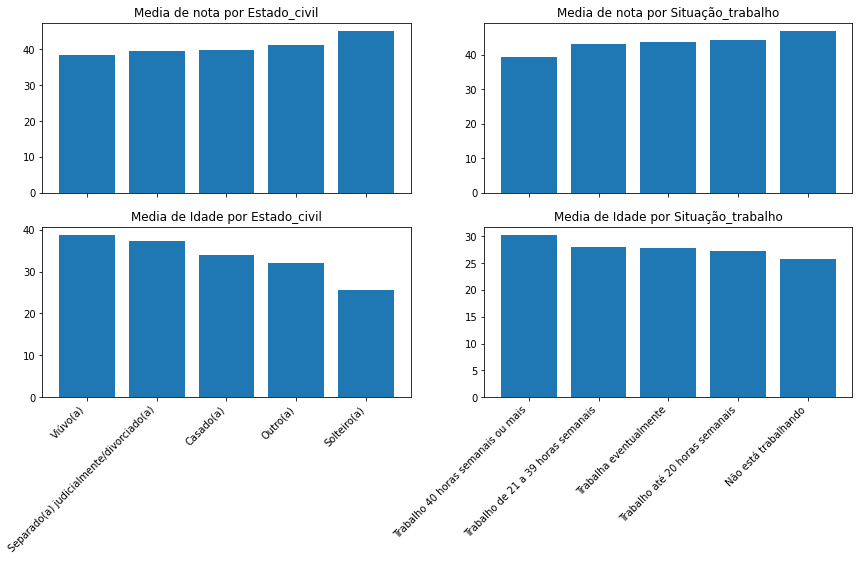

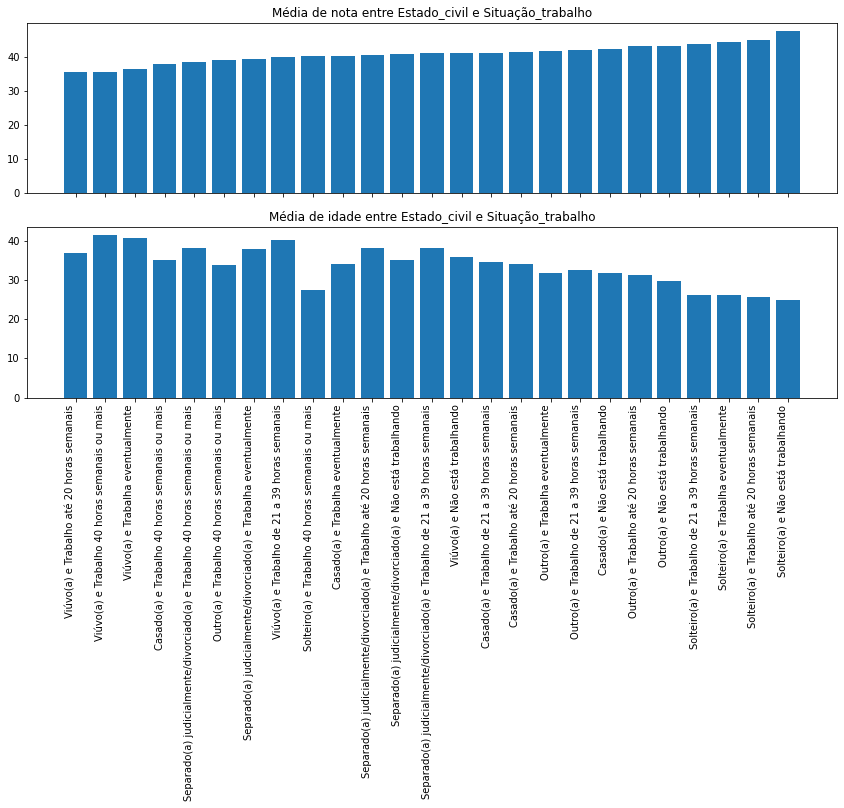

In [ ]:
valores = gerar_grafico_mean(
    ["Estado_civil", "Situação_trabalho"],
    ["Nota","Idade"],
    (2,2)
)
print("\nMÉDIAS ENTRE AS DUAS VARIÁVEIS:")
valores

##Leitura de livros
Livros_lidos:
  - A = Nenhum
  - B = Um ou dois
  - C = De três a cinco
  - D = De seis a oito
  - E = Mais de oito

h/s estudou:
  - A = Nenhuma, apenas assistiu as aulas
  - B = De uma a três
  - C = De quatro a sete
  - D = De oito a doze
  - E = Mais de Doze

      Livros_lidos       Nota      Idade
4       Um ou dois  43.521393  27.407067
3           Nenhum  43.848144  27.173187
1  De três a cinco  44.604551  27.367062
0   De seis a oito  44.814057  27.545825
2     Mais de oito  45.816508  27.519677
              horas/semana estudadas       Nota      Idade
4  Nenhuma, apenas assistiu as aulas  40.000685  27.753479
2                      De uma a três  41.184156  27.689809
1                   De quatro a sete  44.597930  27.275743
0                     De oito a doze  47.212181  27.025513
3                       Mais de Doze  49.861429  26.927997

MÉDIAS ENTRE AS DUAS VARIÁVEIS:


,Livros_lidos,horas/semana estudadas,Nota,Idade,Livros_lidos e horas/semana estudadas
19,Nenhum,"Nenhuma, apenas assistiu as aulas",39.106078,27.650938,"Nenhum e Nenhuma, apenas assistiu as aulas"
24,Um ou dois,"Nenhuma, apenas assistiu as aulas",39.707362,28.064417,"Um ou dois e Nenhuma, apenas assistiu as aulas"
22,Um ou dois,De uma a três,40.691441,27.756574,Um ou dois e De uma a três
17,Nenhum,De uma a três,41.096824,27.449592,Nenhum e De uma a três
7,De três a cinco,De uma a três,41.694702,27.704792,De três a cinco e De uma a três
9,De três a cinco,"Nenhuma, apenas assistiu as aulas",42.468742,27.438374,"De três a cinco e Nenhuma, apenas assistiu as ..."
2,De seis a oito,De uma a três,42.508109,27.802158,De seis a oito e De uma a três
12,Mais de oito,De uma a três,43.123480,27.764554,Mais de oito e De uma a três
4,De seis a oito,"Nenhuma, apenas assistiu as aulas",43.206761,27.323944,"De seis a oito e Nenhuma, apenas assistiu as a..."
14,Mais de oito,"Nenhuma, apenas assistiu as aulas",44.207283,27.328740,"Mais de oito e Nenhuma, apenas assistiu as aulas"


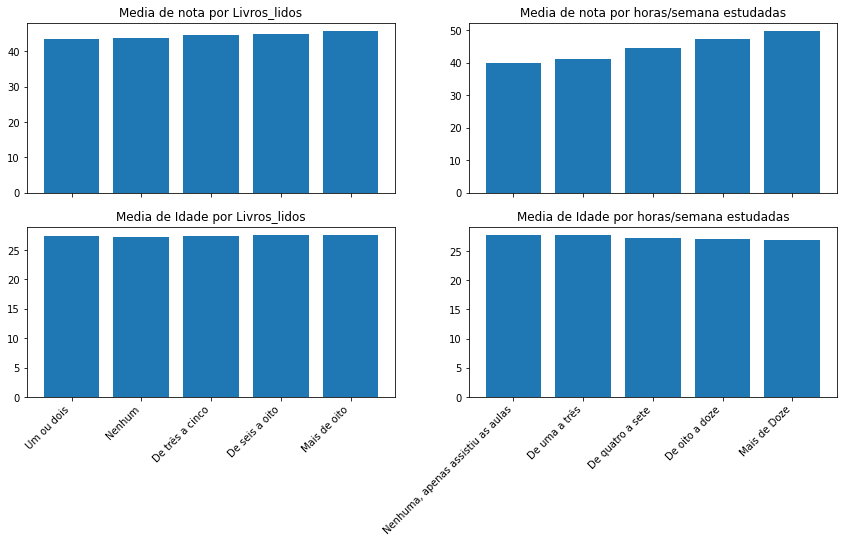

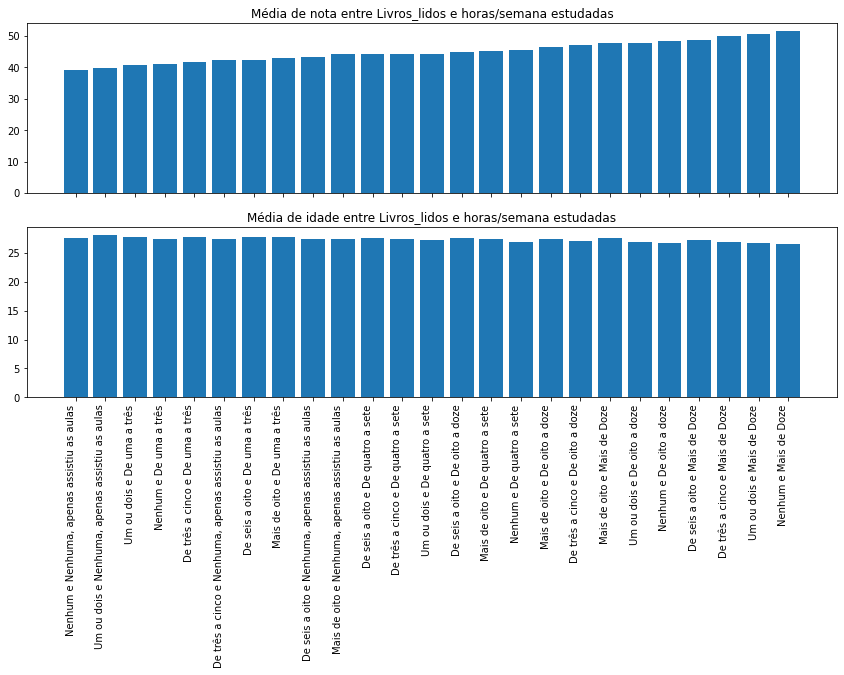

In [ ]:
valores_livros = gerar_grafico_mean(
    ["Livros_lidos", "horas/semana estudadas"],
    ["Nota","Idade"],
    (2,2)
)

print("\nMÉDIAS ENTRE AS DUAS VARIÁVEIS:")
valores_livros

##Escolaridade dos pais

Escolaridade do pai e mãe:
  - "A" : "Nenhuma",
  - "B" : "Ensino Fundamental: 1º ao 5º ano(1º a 4º série)",
  - "C" : "Ensino Fundamental: 6º ao 9º ano(5º a 8º série)",
  - "D" : "Ensino Médio",
  - "E" : "Ensino Superior - Graduação",
  - "F" : "Pós-graduação"

                                  Escolaridade_pai       Nota      Idade
4                                          Nenhuma  39.183355  31.802878
0  Ensino Fundamental: 1º ao 5º ano(1º a 4º série)  41.025399  29.562099
1  Ensino Fundamental: 6º ao 9º ano(5º a 8º série)  42.860673  27.148983
2                                     Ensino Médio  44.244193  26.423739
3                      Ensino Superior - Graduação  47.921146  26.143699
5                                    Pós-graduação  50.944938  25.722942
                                  Escolaridade_mae       Nota      Idade
4                                          Nenhuma  37.203262  35.270402
0  Ensino Fundamental: 1º ao 5º ano(1º a 4º série)  40.274525  30.913146
1  Ensino Fundamental: 6º ao 9º ano(5º a 8º série)  42.058263  27.928051
2                                     Ensino Médio  43.862000  26.570754
3                      Ensino Superior - Graduação  47.501939  25.725744
5                                    Pós-graduação 

,Escolaridade_pai,Escolaridade_mae,Nota,Idade,Escolaridade_pai e Escolaridade_mae
22,Ensino Superior - Graduação,Nenhuma,35.911275,34.970588,Ensino Superior - Graduação e Nenhuma
28,Nenhuma,Nenhuma,36.176518,36.079464,Nenhuma e Nenhuma
4,Ensino Fundamental: 1º ao 5º ano(1º a 4º série),Nenhuma,38.087164,35.412975,Ensino Fundamental: 1º ao 5º ano(1º a 4º série...
16,Ensino Médio,Nenhuma,38.646458,32.344316,Ensino Médio e Nenhuma
24,Nenhuma,Ensino Fundamental: 1º ao 5º ano(1º a 4º série),39.259493,32.572178,Nenhuma e Ensino Fundamental: 1º ao 5º ano(1º ...
10,Ensino Fundamental: 6º ao 9º ano(5º a 8º série),Nenhuma,39.332295,31.608197,Ensino Fundamental: 6º ao 9º ano(5º a 8º série...
0,Ensino Fundamental: 1º ao 5º ano(1º a 4º série),Ensino Fundamental: 1º ao 5º ano(1º a 4º série),39.552254,31.763671,Ensino Fundamental: 1º ao 5º ano(1º a 4º série...
25,Nenhuma,Ensino Fundamental: 6º ao 9º ano(5º a 8º série),40.726855,29.432740,Nenhuma e Ensino Fundamental: 6º ao 9º ano(5º ...
18,Ensino Superior - Graduação,Ensino Fundamental: 1º ao 5º ano(1º a 4º série),40.822992,30.477935,Ensino Superior - Graduação e Ensino Fundament...
26,Nenhuma,Ensino Médio,41.013246,28.294938,Nenhuma e Ensino Médio


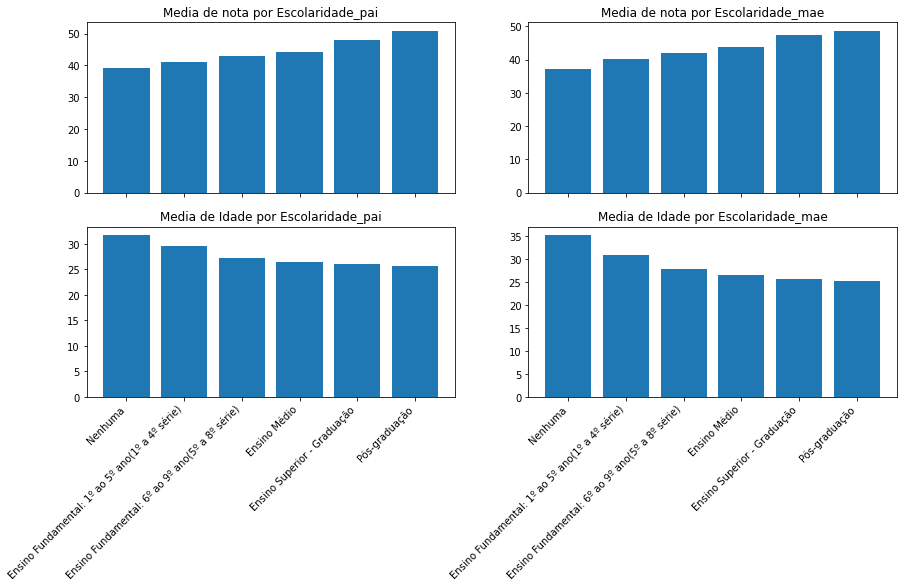

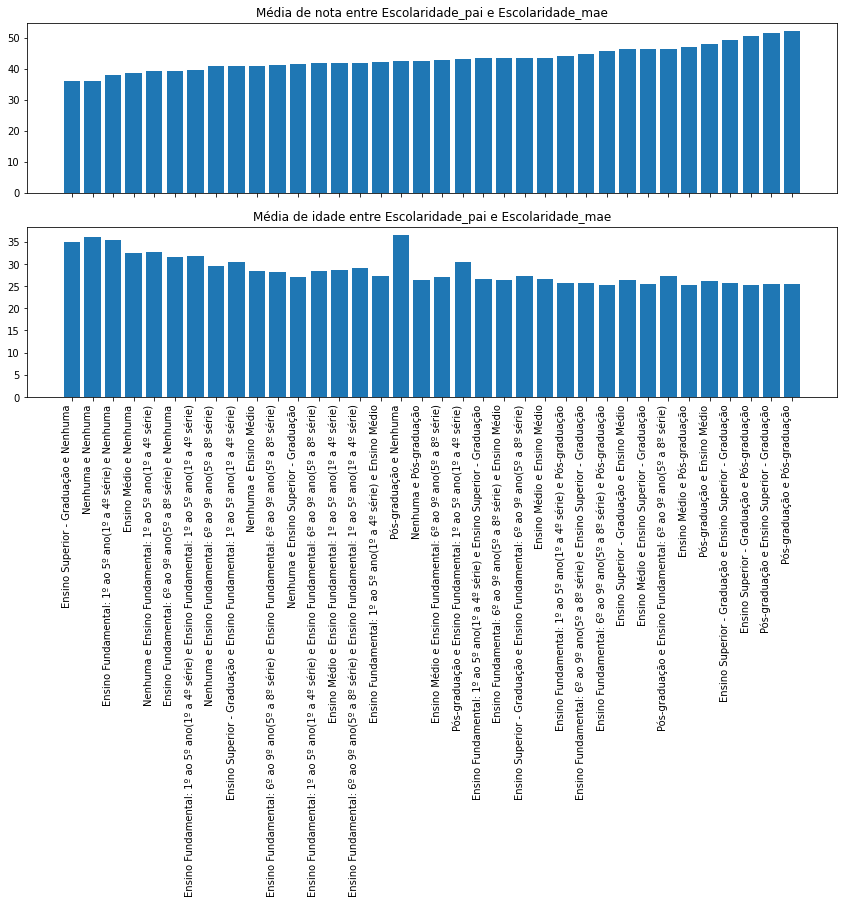

In [ ]:
valores_escolaridade_pais = gerar_grafico_mean(
    ["Escolaridade_pai", "Escolaridade_mae"],
    ["Nota","Idade"],
    (2,2)
)

print("\nMÉDIAS ENTRE AS DUAS VARIÁVEIS:")
valores_escolaridade_pais

##Moradores com participante

Onde que participante mora:
  - "A" : "Em casa ou apartamento, sozinho",
  - "B" : "Em casa ou apartamento, com pais e/ou parentes",
  - "C" : "Em casa ou apartamento, com cônjuge e/ou filhos",
  - "D" : "Em casa ou apartamento, com outras pessoas (incluindo república)",
  - "E" : "Em alojamento universitário da própria instituição",
  - "F" : "Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)"

Quantidade de pessoas que moram com participante:
  - "A" : "Nenhuma",
  - "B" : "Uma",
  - "C" : "Duas",
  - "D" : "Três",
  - "E" : "Quatro",
  - "F" : "Cinco",
  - "G" : "Seis",
  - "H" : "Sete ou mais"

                                       Com_quem_mora       Nota      Idade
1    Em casa ou apartamento, com cônjuge e/ou filhos  39.951933  33.624247
5  Em outros tipos de habitação individual ou col...  44.324735  27.063666
3     Em casa ou apartamento, com pais e/ou parentes  44.669863  25.468891
4                    Em casa ou apartamento, sozinho  44.951170  27.687559
2  Em casa ou apartamento, com outras pessoas (in...  49.124699  25.374616
0  Em alojamento universitário da própria institu...  51.584657  25.459522
  Qt_moradores_participante       Nota      Idade
5              Sete ou mais  40.077520  28.163415
4                      Seis  40.443062  27.896732
0                     Cinco  41.469278  27.492716
3                    Quatro  42.739938  27.384485
1                      Duas  43.983844  27.634210
6                      Três  44.091084  27.089523
7                       Uma  44.146287  27.975270
2                   Nenhuma  47.391358  26.647283

MÉDIAS ENTRE AS DUAS VAR

,Com_quem_mora,Qt_moradores_participante,Nota,Idade,Com_quem_mora e Qt_moradores_participante
37,"Em casa ou apartamento, sozinho",Sete ou mais,32.852778,28.166667,"Em casa ou apartamento, sozinho e Sete ou mais"
12,"Em casa ou apartamento, com cônjuge e/ou filhos",Seis,36.649325,36.092749,"Em casa ou apartamento, com cônjuge e/ou filho..."
40,Em outros tipos de habitação individual ou col...,Cinco,37.057895,28.000000,Em outros tipos de habitação individual ou col...
13,"Em casa ou apartamento, com cônjuge e/ou filhos",Sete ou mais,37.175840,35.305600,"Em casa ou apartamento, com cônjuge e/ou filho..."
8,"Em casa ou apartamento, com cônjuge e/ou filhos",Cinco,37.228415,36.616879,"Em casa ou apartamento, com cônjuge e/ou filho..."
11,"Em casa ou apartamento, com cônjuge e/ou filhos",Quatro,37.727930,37.292446,"Em casa ou apartamento, com cônjuge e/ou filho..."
10,"Em casa ou apartamento, com cônjuge e/ou filhos",Nenhuma,37.829647,31.372941,"Em casa ou apartamento, com cônjuge e/ou filho..."
44,Em outros tipos de habitação individual ou col...,Seis,38.033333,28.619048,Em outros tipos de habitação individual ou col...
14,"Em casa ou apartamento, com cônjuge e/ou filhos",Três,38.522637,36.177770,"Em casa ou apartamento, com cônjuge e/ou filho..."
32,"Em casa ou apartamento, sozinho",Cinco,38.583237,27.450867,"Em casa ou apartamento, sozinho e Cinco"


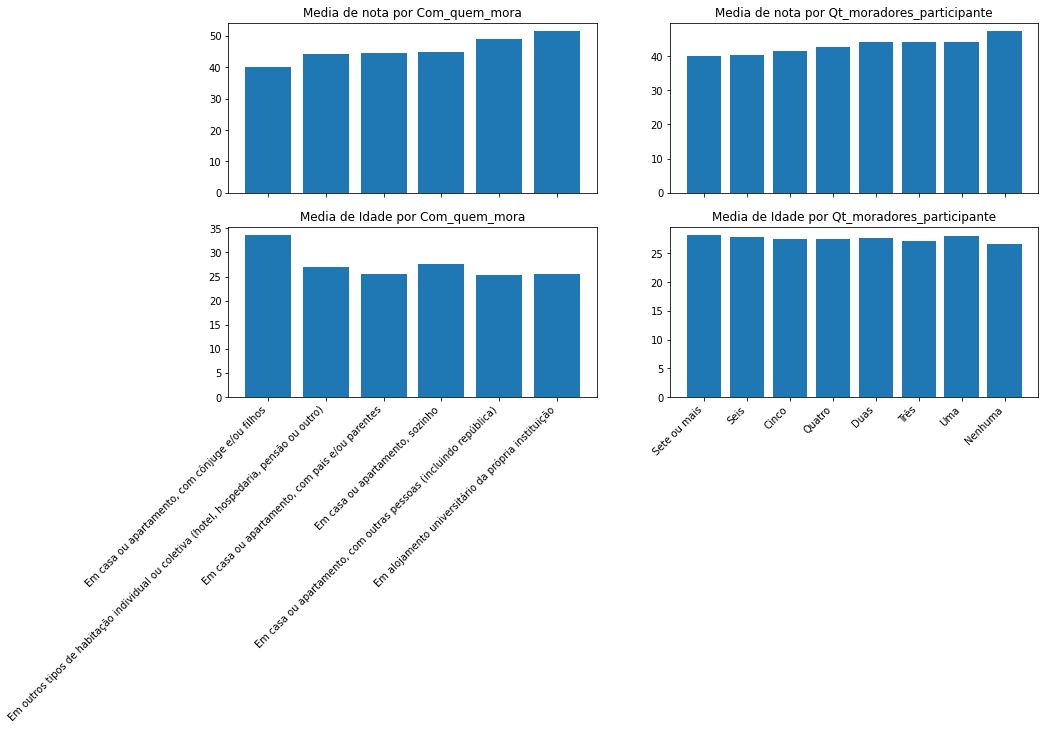

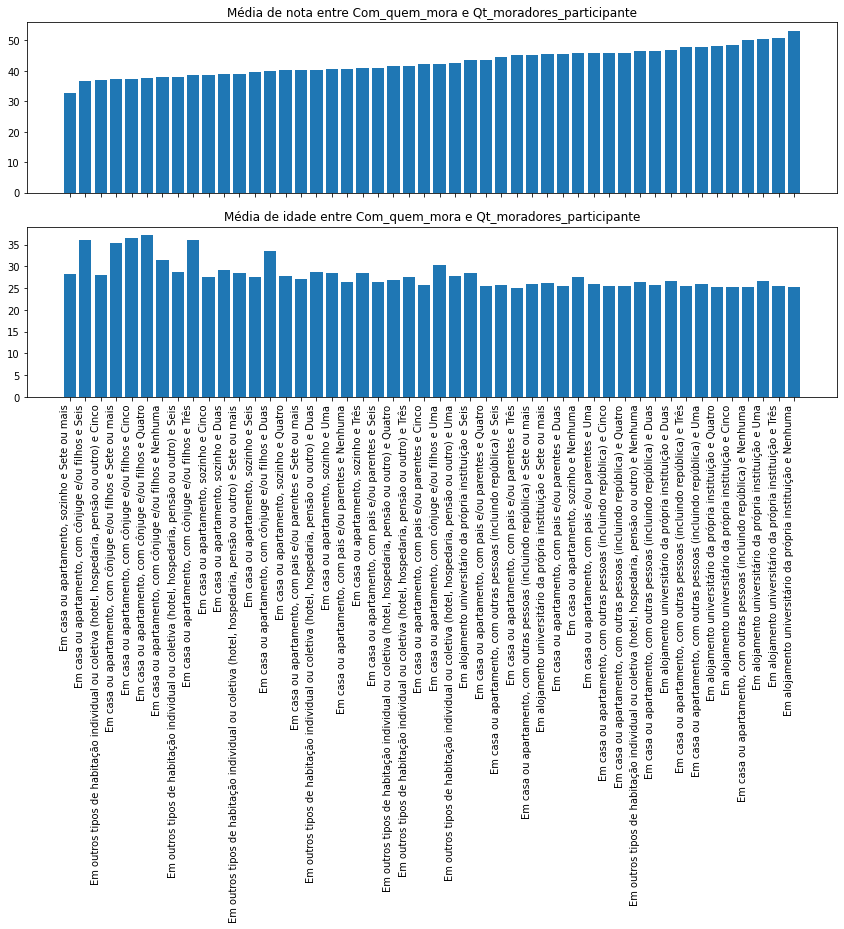

In [ ]:
valores_moradia = gerar_grafico_mean(
    ["Com_quem_mora", "Qt_moradores_participante"],
    ["Nota","Idade"],
    (2,2)
)

print("\nMÉDIAS ENTRE AS DUAS VARIÁVEIS:")
valores_moradia

## Exploração dos valores do atributo RAÇA.
Para facilitar a visualização dos dados os valores que estão em letras serão substituídos pelas respectivas raças e os valores não reconhecidos serão substituídos por raça não declarada.

In [ ]:
#Contagem dos valores únicos na coluna

Dataset_features['Raça/cor'].value_counts()

Branca               210621
Parda                129391
Preta                 31234
Amarela                9579
Não quis declarar      7011
Indígena               1214
Name: Raça/cor, dtype: int64

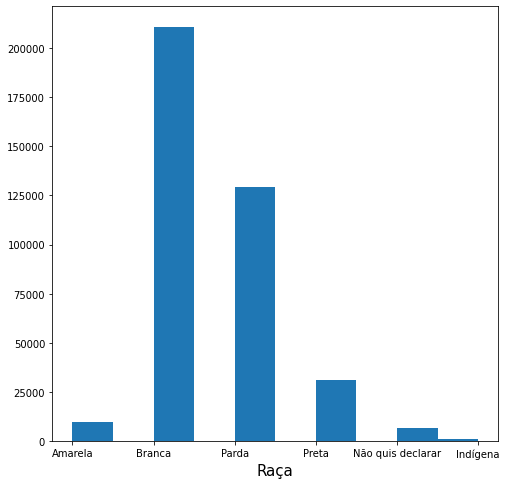

In [ ]:
# Historgrama da raças dos participantes 

plt.figure(figsize=(8,8))
plt.hist(Dataset_features['Raça/cor'])
plt.xlabel('Raça',fontsize=15)
plt.show()

In [ ]:
Dataset_features['Raça/cor'].value_counts()/len(Dataset_features['Raça/cor'])*100

Branca               54.137257
Parda                33.258193
Preta                 8.028274
Amarela               2.462151
Não quis declarar     1.802082
Indígena              0.312042
Name: Raça/cor, dtype: float64

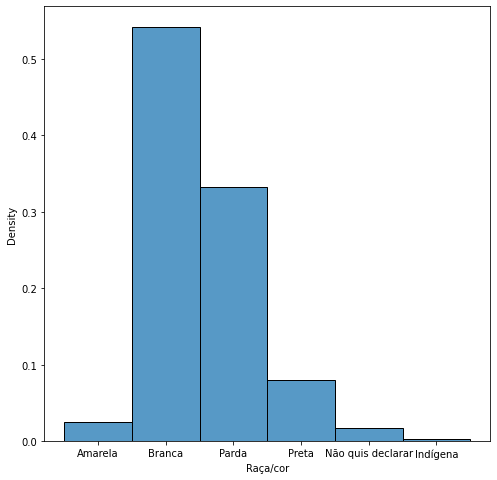

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=Dataset_features, x="Raça/cor",stat='density')

Como resultado do histograma há uma clara predominância racial de brancos (A) e pardos (D). Pelo hitograma de frequência relativa 50% dos que fizeram a prova do enade 2019 são branco e 31% são pardos.

## Análise de raça *versus* média da nota geral

In [ ]:
enade_raca_nota = Dataset_features[['Raça/cor',"Nota"]]

In [ ]:
# Agrupamanto das raças pelo média da nota geral
enade_raca_nota.groupby('Raça/cor').mean().sort_values('Nota')

,Nota
Raça/cor,
Indígena,39.051895
Preta,41.371995
Parda,42.155265
Amarela,43.292306
Branca,45.743001
Não quis declarar,46.621694


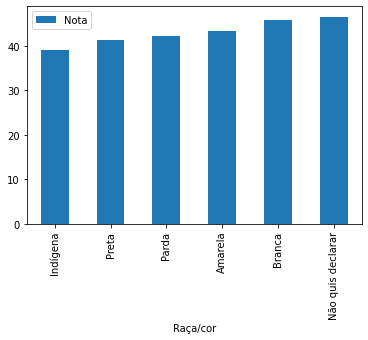

In [ ]:
enade_raca_nota.groupby('Raça/cor').mean().sort_values('Nota').plot.bar()

Raça com maior média na nota geral foi a branca, o segundo lugar fica com aqueles que optaram por não sinalizar sua raça. Mas se considerarmos somentes os participantes que declararam qual grupo racial pertencem os amarelos ficam no segundo lugar. Já a raça com menor nota é a indígena.

##Análise do campo renda familiar (Renda_família)

In [ ]:
Dataset_features['Renda_família'].value_counts()

De 1.5 a 3 salários mínimos     108841
De 3 a 4.5 salários mínimos      79291
Até 1.5 salário mínimo           70107
De 6 a 10 salários mínimos       47847
De 4.5 a 6 salários mínimos      44944
De 10 a 30 salários mínimos      31658
Acima de 30 salários mínimos      6362
Name: Renda_família, dtype: int64

No handles with labels found to put in legend.


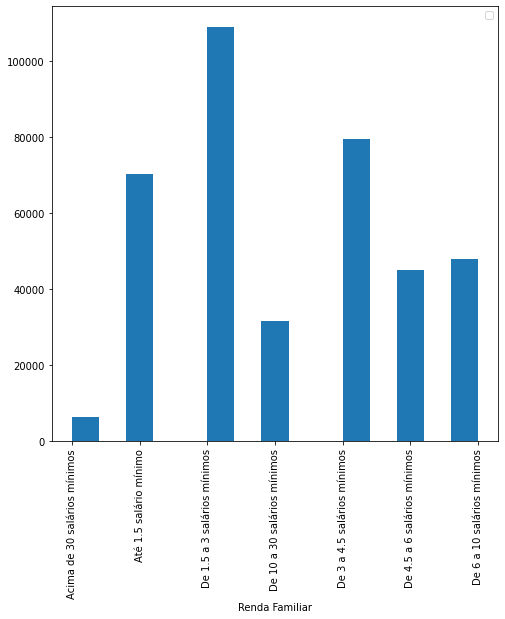

In [ ]:
# Histograma da renda familiar
plt.figure(figsize=(8,8))
plt.hist(Dataset_features['Renda_família'].sort_values(), bins=15)
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Renda Familiar',fontsize=10)
plt.show()

In [ ]:
(Dataset_features['Renda_família'].value_counts()/len(Dataset_features['Renda_família']))*100

De 1.5 a 3 salários mínimos     27.976096
De 3 a 4.5 salários mínimos     20.380671
Até 1.5 salário mínimo          18.020049
De 6 a 10 salários mínimos      12.298419
De 4.5 a 6 salários mínimos     11.552243
De 10 a 30 salários mínimos      8.137257
Acima de 30 salários mínimos     1.635265
Name: Renda_família, dtype: float64

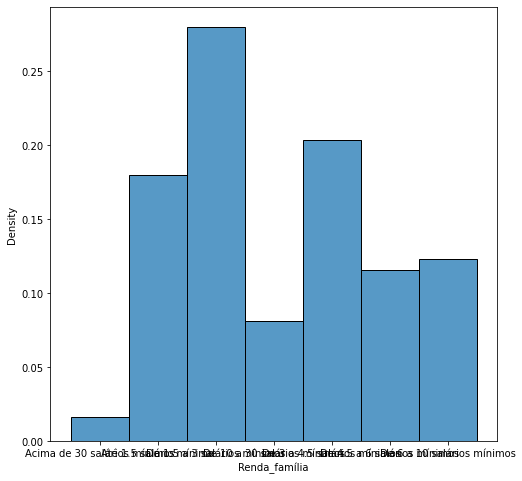

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(Dataset_features['Renda_família'].sort_values(),stat='density')

Dado o histograma há uma predominância de indivíduos de intervalos de renda familiar salários de 1,5 a 3 salários mínimos e de 3 a 4,5 salários mínimos. Após estes vem os de renda de até 1,5.

(predominância de rendas familiares média e baixa)

##Renda familiar *versus* nota geral

In [ ]:
enade_renda_nota = Dataset_features[["Renda_família", "Nota"]]

In [ ]:
enade_renda_nota.groupby('Renda_família').mean().sort_values("Nota")

,Nota
Renda_família,
Até 1.5 salário mínimo,40.827748
De 1.5 a 3 salários mínimos,42.195945
De 3 a 4.5 salários mínimos,43.816480
De 4.5 a 6 salários mínimos,45.265769
De 6 a 10 salários mínimos,47.325105
De 10 a 30 salários mínimos,50.734111
Acima de 30 salários mínimos,52.812087


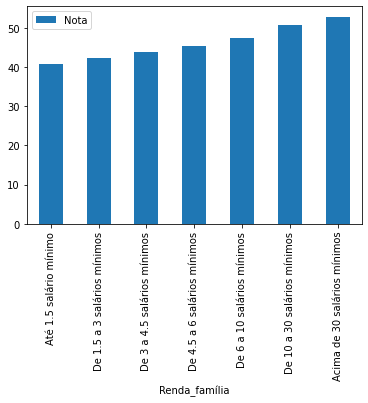

In [ ]:
enade_renda_nota.groupby('Renda_família').mean().sort_values("Nota").plot.bar()

Aparemente há um clara tendência de quanto maior a renda familiar mais a média nota geral.

##Agrupamento dos campos de raça e renda familiar contra a média nota geral.

In [ ]:
enade_raca_renda_nota = Dataset_features[['Raça/cor','Renda_família','Nota']]

In [ ]:
#Valores ordenados por nota



enade_raca_renda_nota.groupby(['Raça/cor','Renda_família'], as_index=False).mean().sort_values("Nota")

,Raça/cor,Renda_família,Nota
16,Indígena,De 1.5 a 3 salários mínimos,37.186777
15,Indígena,Até 1.5 salário mínimo,37.315934
1,Amarela,Até 1.5 salário mínimo,39.199118
19,Indígena,De 4.5 a 6 salários mínimos,39.811009
29,Parda,Até 1.5 salário mínimo,39.840879
36,Preta,Até 1.5 salário mínimo,39.967045
2,Amarela,De 1.5 a 3 salários mínimos,40.799370
37,Preta,De 1.5 a 3 salários mínimos,40.873061
30,Parda,De 1.5 a 3 salários mínimos,41.097086
18,Indígena,De 3 a 4.5 salários mínimos,41.296444


Ao agrupar atributos verifica-se que o grupo com menor média na nota geral são os pretos que deixaram a renda famliar em brancos. Já o agrupamento maior média são os amarelos com renda familiar acima de 30 salários mínimos seguidos de brancos com mesma faixa de renda.

Seguindo a tendência de maior renda maior média na nota geral, o grupo de renda acima de 30 salários mínimos com menor nota são os indígenas depois os pretos. A diferença na nota média entre estes dois grupos de renda mais elevada e menor nota é de: 42,86 para 49,82.



##Conclusão Análise Exploratória

Dada a análise exploratória do conjuntos de dados do ENADE 2019 foi constatado alguns possíveis correlações entre variáveis, como: sexo, idade, renda familiar, raça, estado civíl, escolaridade dos pais etc. em relação à média da nota geral do ENADE. 

É possível, então, construir um modelo de aprendizado de máquina que descreva as possíveis relações entre os atributos e que preveja/classifique notas futuras.

#Análise Machine Learning

##Sample Dataset


In [ ]:
sample_enade = Dataset_features.sample(n = 95000, random_state= 10)

In [ ]:
sample_enade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95000 entries, 157911 to 313211
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Nota                       95000 non-null  float64
 1   Idade                      95000 non-null  int64  
 2   Sexo                       95000 non-null  object 
 3   Estado_civil               95000 non-null  object 
 4   Raça/cor                   95000 non-null  object 
 5   Nacionalidade              95000 non-null  object 
 6   Escolaridade_pai           95000 non-null  object 
 7   Escolaridade_mae           95000 non-null  object 
 8   Com_quem_mora              95000 non-null  object 
 9   Qt_moradores_participante  95000 non-null  object 
 10  Renda_família              95000 non-null  object 
 11  Situação_financeira        95000 non-null  object 
 12  Situação_trabalho          95000 non-null  object 
 13  Bolsa_de_estudos           95000 non-nul

##Transformar idade em intervalos

In [ ]:
sample_enade['Idade_intervalos'] = pd.cut(sample_enade['Idade'],bins=[0,20,25,30,35,40,45,50,100],
                                     labels=['Entre 0 a 20','Entre 20 e 25','Entre 25 e 30', 
                                             'Entre 30 e 35', 'Entre 35 e 40','Entre 40 e 45','Entre 45 e 50', 
                                             "Entre 50 a 100"])

In [ ]:
sample_enade.drop(labels = ["Idade"],axis = 1, inplace = True)

In [ ]:
sample_enade

,Nota,Sexo,Estado_civil,Raça/cor,Nacionalidade,Escolaridade_pai,Escolaridade_mae,Com_quem_mora,Qt_moradores_participante,Renda_família,Situação_financeira,Situação_trabalho,Bolsa_de_estudos,Bolsa_permanência,Bolsa_academica,Atividade_exterior,Ingresso_cota,Estado_ensino_medio,Tipo_ensino_medio,Modalidade_ensino_medio,Incentivou_graduação,Grupo_dificuldade,Familia_curso_superior,Livros_lidos,horas/semana estudadas,Estudo_idioma_estrangeiro,Motivo_curso,Razao_instituicao,Idade_intervalos
157911,67.4,M,Solteiro(a),Branca,Brasileira,Ensino Fundamental: 1º ao 5º ano(1º a 4º série),Ensino Superior - Graduação,"Em casa ou apartamento, com outras pessoas (in...",Duas,De 1.5 a 3 salários mínimos,"Tem renda, mas recebe ajuda da família ou de o...",Trabalho 40 horas semanais ou mais,"ProUni parcial, apenas",Nenhum,Nenhum,Não,Por ter estudado em escola pública ou em parti...,Norte,Todo em escola pública,Ensino médio tradicional,Pais,Não teve dificuldade,Sim,Um ou dois,De uma a três,Modalidade presencial,Inserção no mercado de trabalho,Possibilidade de ter bolsa de estudo,Entre 20 e 25
110446,27.6,F,Solteiro(a),Parda,Brasileira,Ensino Médio,Ensino Médio,"Em casa ou apartamento, com outras pessoas (in...",Uma,De 1.5 a 3 salários mínimos,"Não tem renda, gastos financiados por programa...",Trabalho 40 horas semanais ou mais,"FIES, apenas",Nenhum,Nenhum,Não,Nenhuma,Centro-Oeste,Todo em escola pública,Profissionalizante técnico,Pais,Pais,Não,Nenhum,De uma a três,Não,Outro motivo,Outro motivo,Entre 20 e 25
380842,27.0,M,Solteiro(a),Parda,Brasileira,Ensino Médio,Ensino Médio,"Em casa ou apartamento, com pais e/ou parentes",Seis,De 3 a 4.5 salários mínimos,Tem renda e não precisa de ajuda para financia...,Trabalho 40 horas semanais ou mais,ProUni integral,Nenhum,Nenhum,Não,Por critério de renda,Sudeste,Todo em escola pública,Ensino médio tradicional,Pais,Pais,Não,De três a cinco,De quatro a sete,Não,Vocação,Qualidade/reputação,Entre 25 e 30
213333,32.3,M,Solteiro(a),Parda,Brasileira,Nenhuma,Ensino Fundamental: 1º ao 5º ano(1º a 4º série),"Em casa ou apartamento, com pais e/ou parentes",Duas,De 1.5 a 3 salários mínimos,Tem renda e contribue com sustento da família,Trabalho 40 horas semanais ou mais,Bolsa oferecida pela instituição,Nenhum,Outro tipo de bolsa acadêmica,Não,Nenhuma,Norte,Todo em escola pública,Ensino médio tradicional,Outras pessoas,Não teve dificuldade,Não,Um ou dois,De uma a três,Não,Outro motivo,Proximidade do meu trabalho,Entre 35 e 40
209658,60.0,M,Solteiro(a),Branca,Brasileira,Ensino Médio,Ensino Fundamental: 6º ao 9º ano(5º a 8º série),"Em casa ou apartamento, com pais e/ou parentes",Quatro,De 3 a 4.5 salários mínimos,"Tem renda, mas recebe ajuda da família ou de o...",Trabalho de 21 a 39 horas semanais,"FIES, apenas",Nenhum,Nenhum,Não,Nenhuma,Sudeste,Todo em escola privada(particular),Ensino médio tradicional,Ninguém,Professores do curso,Não,De três a cinco,De quatro a sete,Não,Valorização profissional,Proximidade da minha residência,Entre 25 e 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352455,22.3,F,Solteiro(a),Parda,Brasileira,Ensino Médio,Ensino Fundamental: 1º ao 5º ano(1º a 4º série),"Em casa ou apartamento, com pais e/ou parentes",Três,De 1.5 a 3 salários mínimos,"Não tem renda, gastos financiados pela família...",Não está trabalhando,"FIES, apenas",Nenhum,Nenhum,Não,Nenhuma,Sudeste,Todo em escola pública,Ensino médio tradicional,Pais,Pais,Sim,Nenhum,De quatro a sete,Não,Influência familiar,Facilidade de acesso,Entre 20 e 25
412357,43.3,F,Solteiro(a),Parda,Brasileira,Ensino Médio,Ensino Fundamental: 6º ao 9º ano(5º a 8º série),"Em casa ou apartamento, com pais e/ou parentes",Duas,De 6 a 10 salários mínimos,"Não tem renda, gastos financiados pela família...",Não está trabalhando,"Nenhum, porém curso não gratuito",Nenhum,Nenhum,Não,Nenhuma,Sudeste,Todo em escola privada(particular),Profissionalizante técnico,Ninguém,Não teve dificuldade,Sim,Um 

##Cross validation / Randomized Search

Dependências

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from google.colab import files

###Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
X = sample_enade.drop(labels = ["Nota"],axis = 1)
Y = sample_enade["Nota"]

X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(76000, 28) (76000,)
(19000, 28) (19000,)


####Quartil

In [ ]:
features_selection = Pipeline([('ordinalencoder',OrdinalEncoder()),
     ('randomforestclassifier',RandomForestClassifier(n_estimators= 200, n_jobs= -1))])

In [ ]:
pipe_OE = Pipeline([('ordinalencoder',OrdinalEncoder()),
     ('randomforestclassifier',RandomForestClassifier( n_jobs= -1))])

In [ ]:
y_train_quartil = pd.qcut(y_train,4,labels=[0,1,2,3])
y_test_quartil = pd.qcut(y_test,4,labels=[0,1,2,3])

#####Analise de features selected

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)


In [ ]:
fs = SelectKBest(score_func=chi2, k=15)
fs.fit(X_train_enc, y_train_quartil)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

In [ ]:
df_select = pd.DataFrame(data=fs.scores_,index=X_train.columns)

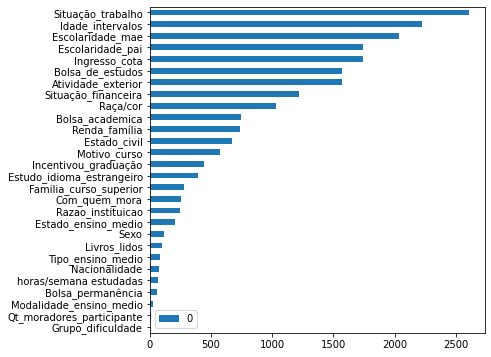

In [ ]:
df_select.sort_values(by=0).plot.barh(figsize=(6,6))

#####Execução Ordinal Encoder

In [ ]:
X_train_quartil = X_train[["Situação_trabalho","Idade_intervalos","Ingresso_cota","Bolsa_de_estudos","Atividade_exterior",
                           "Situação_financeira","Escolaridade_mae","Raça/cor","Escolaridade_pai","Bolsa_academica",
                           "Renda_família","Estado_civil","Motivo_curso","Incentivou_graduação","Estudo_idioma_estrangeiro"]]
X_test_quartil = X_test[["Situação_trabalho","Idade_intervalos","Ingresso_cota","Bolsa_de_estudos","Atividade_exterior",
                           "Situação_financeira","Escolaridade_mae","Raça/cor","Escolaridade_pai","Bolsa_academica",
                           "Renda_família","Estado_civil","Motivo_curso","Incentivou_graduação","Estudo_idioma_estrangeiro"]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {
  'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'randomforestclassifier__max_features': ['auto', 'sqrt'],
 'randomforestclassifier__min_samples_leaf': [1, 2, 4],
 'randomforestclassifier__min_samples_split': [2, 5, 10,20],
 'randomforestclassifier__n_estimators': [100, 200, 400, 600, 800, 1000]}


clf = RandomizedSearchCV(pipe_OE, n_iter=300,param_distributions=parameters,cv = 3, n_jobs = -1,pre_dispatch = 10, scoring = [
  "accuracy",
  "f1_macro",
  "precision_macro",
  "recall_macro",    
  "f1_micro",
  "precision_micro",
  "recall_micro",                                            
],
refit = "f1_macro",verbose = 1)

clf.fit(X_train_quartil,y_train_quartil)

resultados_gridsearch_quartil = pd.DataFrame(clf.cv_results_)

resultados_gridsearch_quartil.to_csv('resultados_gridsearch_RF_quartil_OE.csv',index=False)
files.download('resultados_gridsearch_RF_quartil_OE.csv')

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  3.9min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed: 35.7min
[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed: 66.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 72.4min finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred = clf.best_estimator_.predict(X_test_quartil)

In [ ]:
print(metrics.classification_report(y_test_quartil, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.55      0.47      4754
           1       0.29      0.21      0.24      4776
           2       0.29      0.19      0.23      4750
           3       0.44      0.57      0.50      4720

    accuracy                           0.38     19000
   macro avg       0.36      0.38      0.36     19000
weighted avg       0.36      0.38      0.36     19000



In [ ]:
clf.best_params_

{'randomforestclassifier__max_depth': 60,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 20,
 'randomforestclassifier__n_estimators': 200}

In [ ]:
feature_importances = clf.best_estimator_['randomforestclassifier'].feature_importances_.reshape((15,1))

In [ ]:
df_importance = pd.DataFrame(data=feature_importances,index=X_train_quartil.columns)

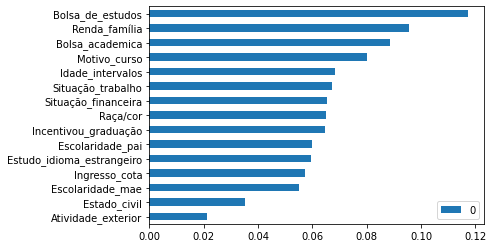

In [ ]:
df_importance.sort_values(by=0).plot.barh()

In [ ]:
RF_quartil = Pipeline([('ordinalencoder',OrdinalEncoder()),
     ('randomforestclassifier',RandomForestClassifier( n_jobs= -1,
                                                      max_depth= None,
                                                      max_features= 'auto',
                                                      min_samples_leaf = 2,
                                                      min_samples_split = 10,
                                                      n_estimators = 1000))])

In [ ]:
RF_quartil.fit(X_train_quartil,y_train_quartil)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=2,
                                        min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=1000, n_jobs=-1,
                                        oob_score=False, random_state=None,
          

Confusion matrix, without normalization
[[2634  913  614  593]
 [1882  985  831 1078]
 [1272  881  908 1689]
 [ 699  595  753 2673]]
Normalized confusion matrix
[[0.55405974 0.1920488  0.1291544  0.12473706]
 [0.3940536  0.20623953 0.17399497 0.22571189]
 [0.26778947 0.18547368 0.19115789 0.35557895]
 [0.14809322 0.12605932 0.1595339  0.56631356]]


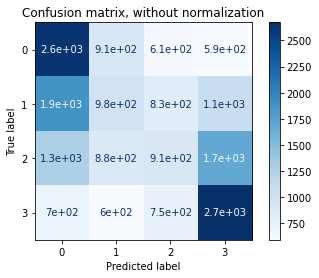

<Figure size 576x576 with 0 Axes>

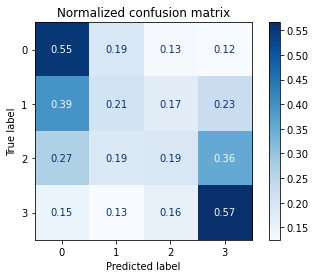

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
  disp = plot_confusion_matrix(clf.best_estimator_["randomforestclassifier"], clf.best_estimator_["ordinalencoder"].fit_transform(X_test_quartil),
                               y_test_quartil,
                                 #display_labels=classnames,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                               labels = [0,1,2,3]
                               )
  disp.ax_.set_title(title)
  plt.figure(figsize=(8,8))
  print(title)
  print(disp.confusion_matrix)

####25% piores


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
features_selection_menores = Pipeline([('ordinalencoder',OrdinalEncoder()),
     ('randomforestclassifier',RandomForestClassifier(n_estimators= 200,class_weight= "balanced_subsample", n_jobs= -1))])

In [ ]:
pipe_OE = Pipeline([('under',RandomUnderSampler(sampling_strategy='majority')),('ordinalencoder',OrdinalEncoder()),
     ('randomforestclassifier',RandomForestClassifier(n_jobs= -1))])

In [ ]:
y_train_menores = pd.qcut(y_train,[0,.25,1],labels=[0,1])
y_test_menores = pd.qcut(y_test,[0,.25,1],labels=[0,1])

In [ ]:
y_train_menores.value_counts()

1    56931
0    19069
Name: Nota, dtype: int64

#####Analise de features selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
oe = OrdinalEncoder()
oe.fit(X_train)
X_train_enc = oe.transform(X_train)
X_test_enc = oe.transform(X_test)


In [ ]:
fs = SelectKBest(score_func=chi2, k=15)
fs.fit(X_train_enc, y_train_menores)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

In [ ]:
df_select = pd.DataFrame(data=fs.scores_,index=X_train.columns)

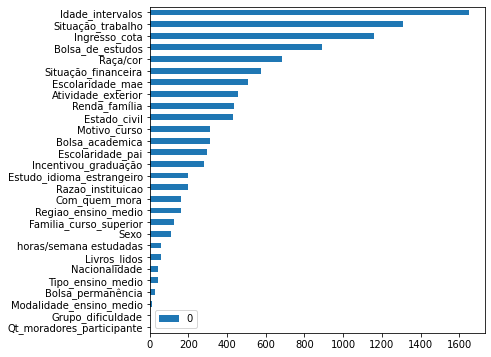

In [ ]:
df_select.sort_values(by=0).plot.barh(figsize=(6,6))

#####Execução Ordinal Encoder

In [ ]:
X_train_menores = X_train[["Situação_trabalho","Idade_intervalos","Ingresso_cota","Bolsa_de_estudos","Atividade_exterior",
                           "Situação_financeira","Escolaridade_mae","Raça/cor","Escolaridade_pai","Bolsa_academica",
                           "Renda_família","Estado_civil","Motivo_curso","Incentivou_graduação","Estudo_idioma_estrangeiro"]]
X_test_menores = X_test[["Situação_trabalho","Idade_intervalos","Ingresso_cota","Bolsa_de_estudos","Atividade_exterior",
                           "Situação_financeira","Escolaridade_mae","Raça/cor","Escolaridade_pai","Bolsa_academica",
                           "Renda_família","Estado_civil","Motivo_curso","Incentivou_graduação","Estudo_idioma_estrangeiro"]]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
  'randomforestclassifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'randomforestclassifier__max_features': ['auto', 'sqrt'],
 'randomforestclassifier__min_samples_leaf': [1, 2, 4],
 'randomforestclassifier__min_samples_split': [2, 5, 10,20],
 'randomforestclassifier__n_estimators': [100, 200, 400, 600, 800, 1000]}


clf_25p_OE = RandomizedSearchCV(pipe_OE, n_iter=300,param_distributions=parameters,cv = 3, n_jobs = -1,pre_dispatch = 10, scoring = [
  "accuracy",
  "f1_macro",
  "precision_macro",
  "recall_macro",
  "f1_micro",
  "precision_micro",
  "recall_micro"                                                 
],
refit = "f1_macro",verbose = 1)

clf_25p_OE.fit(X_train_menores,y_train_menores)

resultados_gridsearch_quartil = pd.DataFrame(clf_25p_OE.cv_results_)

resultados_gridsearch_quartil.to_csv('resultados_gridsearch_RF_25Menor_OE.csv',index=False)
files.download('resultados_gridsearch_RF_25Menor_OE.csv')

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed: 35.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 40.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred = clf_25p_OE.best_estimator_.predict(X_test_menores)

In [ ]:
print(metrics.classification_report(y_test_menores, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.70      0.49      4754
           1       0.86      0.61      0.71     14246

    accuracy                           0.63     19000
   macro avg       0.62      0.65      0.60     19000
weighted avg       0.74      0.63      0.66     19000



In [ ]:
clf_25p_OE.best_params_

{'randomforestclassifier__max_depth': 90,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__min_samples_split': 20,
 'randomforestclassifier__n_estimators': 100}

In [ ]:
feature_importances = clf_25p_OE.best_estimator_['randomforestclassifier'].feature_importances_.reshape((15,1))

In [ ]:
df_importance = pd.DataFrame(data=feature_importances,index=X_train_menores.columns)

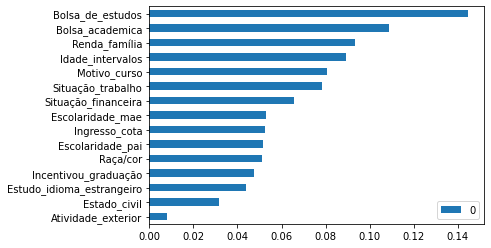

In [ ]:
df_importance.sort_values(by=0).plot.barh()

Confusion matrix, without normalization
[[3309 1445]
 [5535 8711]]
Normalized confusion matrix
[[0.69604544 0.30395456]
 [0.38853011 0.61146989]]


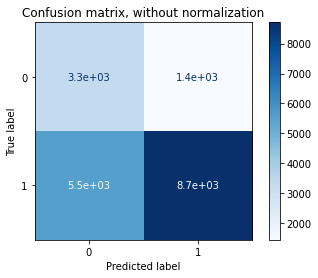

<Figure size 576x576 with 0 Axes>

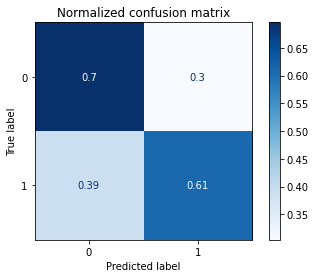

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
  disp = plot_confusion_matrix(clf_25p_OE.best_estimator_["randomforestclassifier"], 
                               pipe_OE["ordinalencoder"].fit_transform(X_test_menores),
                               y_test_menores,
                                 #display_labels=classnames,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                               labels = [0,1]
                               )
  disp.ax_.set_title(title)
  plt.figure(figsize=(8,8))
  print(title)
  print(disp.confusion_matrix)

#Analise bônus

##Quartil

###25% melhores

In [ ]:
features_selection_maiores = Pipeline([('ordinalencoder',OrdinalEncoder()),
     ('randomforestclassifier',RandomForestClassifier(n_estimators= 200, n_jobs= -1))])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

pipe_OE = Pipeline([('ordinalencoder',OrdinalEncoder()),
     ('randomforestclassifier',RandomForestClassifier( n_jobs= -1))])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

pipe_OHE = Pipeline([('onehotencoder',OneHotEncoder()),
     ('randomforestclassifier',RandomForestClassifier( n_jobs= -1))])

In [ ]:
y_train_maiores = pd.qcut(y_train,[0,.75,1],labels=[0,1])
y_test_maiores = pd.qcut(y_test,[0,.75,1],labels=[0,1])

#####Analise de features selection

In [ ]:
features_selection_maiores.fit(X_train_maiores,y_train_maiores)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=200, n_jobs=-1,
                                        oob_score=False, random_state=None,
                                        verbose=0, w

In [ ]:
feature_importances = features_selection_menores['randomforestclassifier'].feature_importances_.reshape((28,1))

In [ ]:
df_importance = pd.DataFrame(data=feature_importances,index=X_train.columns)

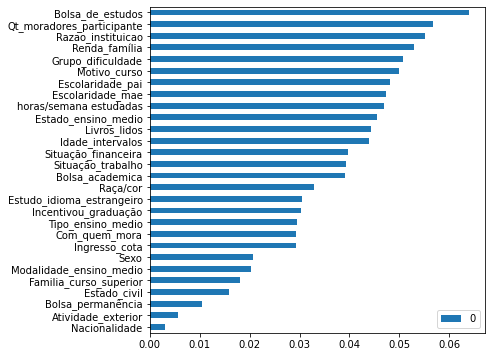

In [ ]:
df_importance.sort_values(by=0).plot.barh(figsize=(6,6))

#####Execução Ordinal Encoder

In [ ]:
X_train_maiores = X_train[['Qt_moradores_participante','Razao_instituicao','Grupo_dificuldade','Renda_família','Bolsa_de_estudos',
                   'Livros_lidos','Escolaridade_pai','Escolaridade_mae','horas/semana estudadas','Motivo_curso',
                   'Estado_ensino_medio','Situação_financeira','Idade_intervalos','Bolsa_academica','Situação_trabalho']]
X_test_maiores = X_test[['Qt_moradores_participante','Razao_instituicao','Grupo_dificuldade','Renda_família','Bolsa_de_estudos',
                   'Livros_lidos','Escolaridade_pai','Escolaridade_mae','horas/semana estudadas','Motivo_curso',
                   'Estado_ensino_medio','Situação_financeira','Idade_intervalos','Bolsa_academica','Situação_trabalho']]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {
  'randomforestclassifier__max_depth': [None,1,2,3,4,5,10],
 'randomforestclassifier__max_features': ['auto', 'sqrt'],
 'randomforestclassifier__min_samples_leaf': [1, 2, 4],
 'randomforestclassifier__min_samples_split': [2, 5, 10,20],
 'randomforestclassifier__n_estimators': [10,100,1000]}


clf_25m_OE = RandomizedSearchCV(pipe_OE, n_iter=300,param_distributions=parameters,cv = 3, n_jobs = -1,pre_dispatch = 10, scoring = [
  "accuracy",
  "f1_macro",
  "precision_macro",
  "recall_macro",
  "f1_micro",
  "precision_micro",
  "recall_micro"                                                 
],
refit = "f1_macro",verbose = 1)

clf_25m_OE.fit(X_train_maiores,y_train_maiores)

resultados_gridsearch_quartil = pd.DataFrame(clf_25m_OE.cv_results_)

resultados_gridsearch_quartil.to_csv('resultados_gridsearch_RF_25Melhores_OE.csv',index=False)
files.download('resultados_gridsearch_RF_25Melhores_OE.csv')

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:  5.5min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 36.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred = clf_25m_OE.best_estimator_.predict(X_test_maiores)

In [ ]:
print(metrics.classification_report(y_test_maiores, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78      8557
           1       0.43      0.65      0.51      2843

    accuracy                           0.69     11400
   macro avg       0.64      0.68      0.65     11400
weighted avg       0.75      0.69      0.71     11400



In [ ]:
clf_25m_OE.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__n_estimators': 1000}

In [ ]:
feature_importances = clf_25m_OE.best_estimator_['randomforestclassifier'].feature_importances_.reshape((15,1))

In [ ]:
df_importance = pd.DataFrame(data=feature_importances,index=X_train_maiores.columns)

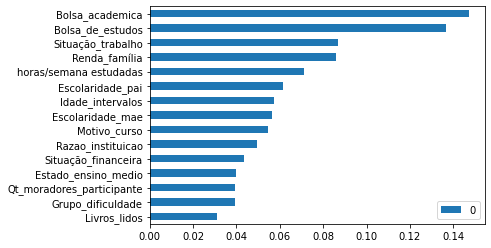

In [ ]:
df_importance.sort_values(by=0).plot.barh()

Confusion matrix, without normalization
[[6080 2477]
 [1000 1843]]
Normalized confusion matrix
[[0.71052939 0.28947061]
 [0.35174112 0.64825888]]


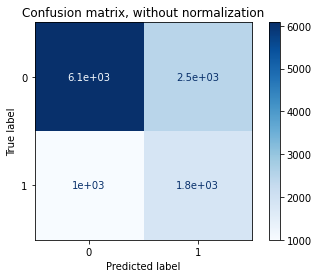

<Figure size 576x576 with 0 Axes>

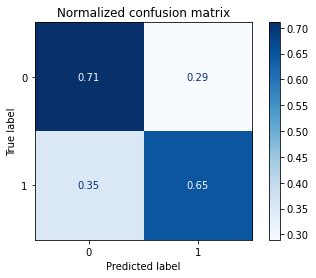

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
  disp = plot_confusion_matrix(clf_25m_OE.best_estimator_["randomforestclassifier"], 
                               pipe_OE["ordinalencoder"].fit_transform(X_test_maiores),
                               y_test_maiores,
                                 #display_labels=classnames,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                               labels = [0,1]
                               )
  disp.ax_.set_title(title)
  plt.figure(figsize=(8,8))
  print(title)
  print(disp.confusion_matrix)

Confusion matrix, without normalization
[[2383  468]
 [4599 3950]]
Normalized confusion matrix
[[0.83584707 0.16415293]
 [0.53795766 0.46204234]]


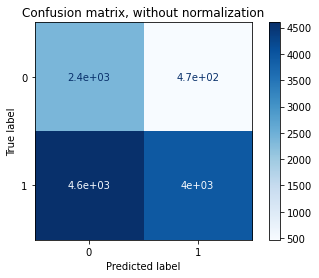

<Figure size 576x576 with 0 Axes>

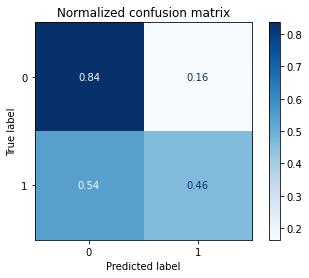

<Figure size 576x576 with 0 Axes>

In [ ]:
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
  disp = plot_confusion_matrix(RF_melhores["randomforestclassifier"], RF_melhores["ordinalencoder"].fit_transform(X_test_maiores),
                               y_test_menores,
                                 #display_labels=classnames,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                               labels = [0,1]
                               )
  disp.ax_.set_title(title)
  plt.figure(figsize=(8,8))
  print(title)
  print(disp.confusion_matrix)

### XGBoost

In [ ]:
from xgboost import XGBClassifier,plot_importance,plot_tree
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y = sample_enade['Nota'] 
X = sample_enade.drop(labels=["Nota"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

Tratamento de Target com classes separadas por quartis, 25% piores notas com 75% das melhores e 25% das melhores com 75% piores. Nos três esquemas o dataset é balanceado.

In [ ]:
# Classes por quartil
#y_train_quartil = pd.qcut(y_train,4,labels=[0,1,2,3])
#y_test_quartil = pd.qcut(y_test,4,labels=[0,1,2,3])

In [ ]:
# As 25% menores notas e 75% maiores
#y_train_25_menores = pd.qcut(y_train,[0,.25,1],labels=[0,1])
#y_test_25_menores = pd.qcut(y_test,[0,.25,1],labels=[0,1])

In [ ]:
# As 25% maiores notas e 75% menores
y_train_25_maiores = pd.qcut(y_train,[0,.75,1],labels=[0,1])
y_test_25_maiores = pd.qcut(y_test,[0,.75,1],labels=[0,1])

####Quartil

#####Analise de features selection

In [ ]:
# Selação de colunas para target tranformado pelos quartis

pipe = Pipeline([('ordinalencoder',OrdinalEncoder()),
     ('xgboost',XGBClassifier(n_estimators=200,n_jobs=-1,tree_method='gpu_hist',objective='multi:softmax'))])

In [ ]:
X_train.columns

Index(['Sexo', 'Estado_civil', 'Raça/cor', 'Nacionalidade', 'Escolaridade_pai',
       'Escolaridade_mae', 'Com_quem_mora', 'Qt_moradores_participante',
       'Renda_família', 'Situação_financeira', 'Situação_trabalho',
       'Bolsa_de_estudos', 'Bolsa_permanência', 'Bolsa_academica',
       'Atividade_exterior', 'Ingresso_cota', 'Estado_ensino_medio',
       'Tipo_ensino_medio', 'Modalidade_ensino_medio', 'Incentivou_graduação',
       'Grupo_dificuldade', 'Familia_curso_superior', 'Livros_lidos',
       'horas/semana estudadas', 'Estudo_idioma_estrangeiro', 'Motivo_curso',
       'Razao_instituicao', 'Idade_intervalos'],
      dtype='object')

In [ ]:
pipe.fit(X_train, y_train_quartil)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=-1, nthread=None,
                               objective='multi:softprob', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               tree_method='gpu_hist', verbosity=1))],
         verbose=False)

In [ ]:
pipe['xgboost'].get_booster().feature_names = list(X_train.columns)

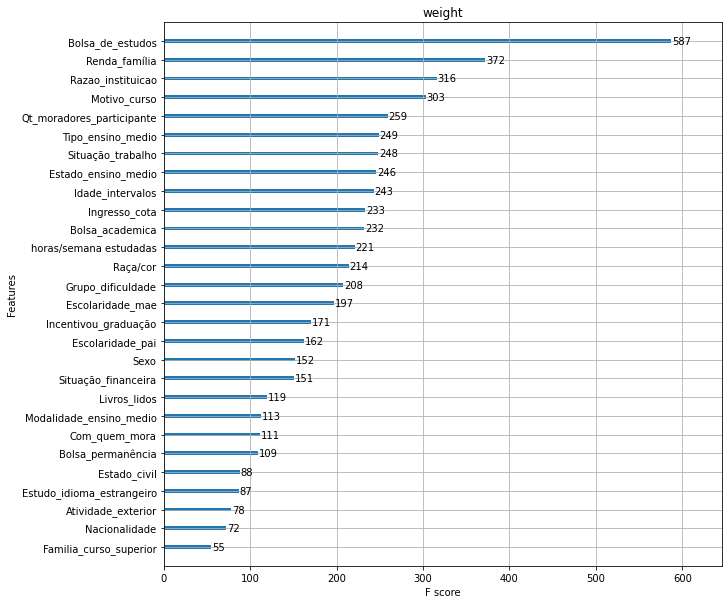

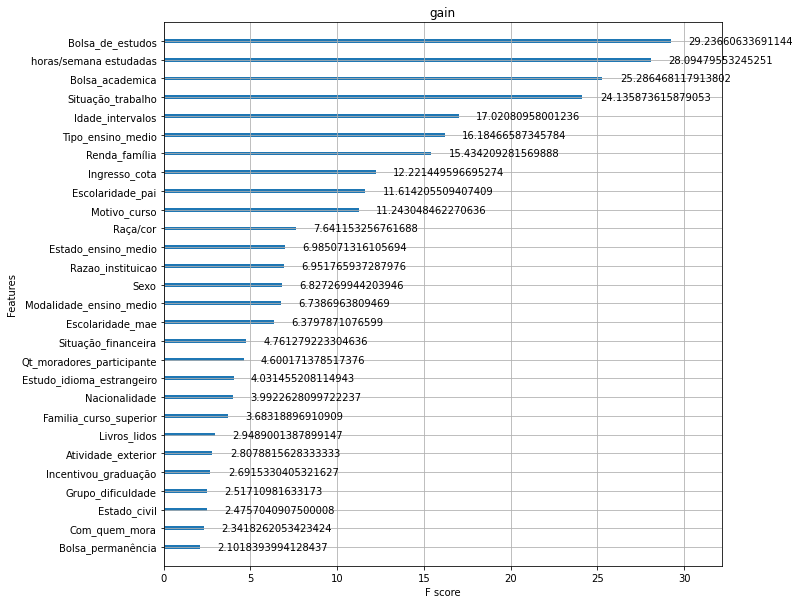

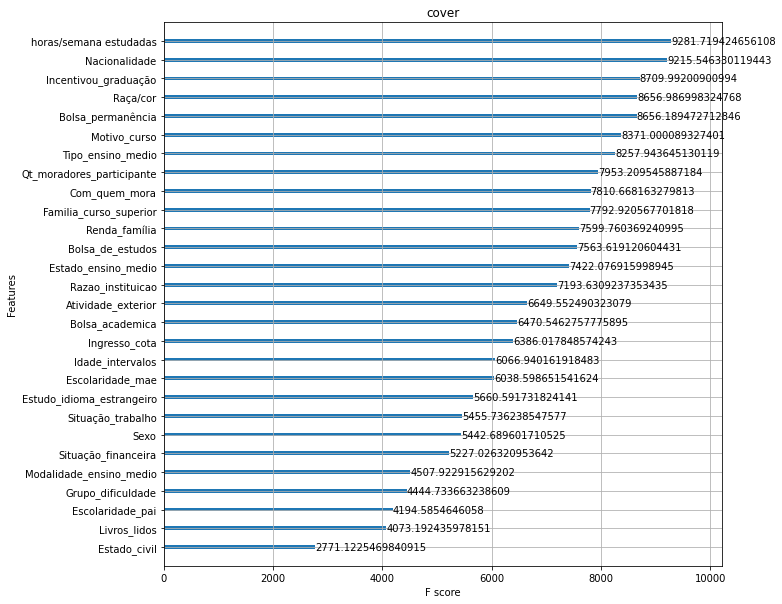

In [ ]:
for i in ["weight", "gain", "cover"]:
  ax = plot_importance(pipe['xgboost'],importance_type=i,title=i)
  #ax.set_yticklabels(pipe['xgboost'].feature_names)
  fig = ax.figure
  
  fig.set_size_inches(10, 10)

##### Execução Ordinal Encoder

In [ ]:
X_train_quartil = X_train[['Bolsa_de_estudos', 'horas/semana estudadas', 'Bolsa_academica', 'Situação_trabalho',
'Idade_intervalos', 'Tipo_ensino_medio', 'Renda_família', 'Ingresso_cota', "Escolaridade_pai",
'Motivo_curso', 'Raça/cor', 'Estado_ensino_medio', 'Razao_instituicao', 'Sexo','Modalidade_ensino_medio']]

In [ ]:
X_test_quartil = X_test[['Bolsa_de_estudos', 'horas/semana estudadas', 'Bolsa_academica', 'Situação_trabalho',
'Idade_intervalos', 'Tipo_ensino_medio', 'Renda_família', 'Ingresso_cota', "Escolaridade_pai",
'Motivo_curso', 'Raça/cor', 'Estado_ensino_medio', 'Razao_instituicao', 'Sexo','Modalidade_ensino_medio']]

In [ ]:
print(X_train_quartil.shape, X_test.shape)

(45600, 15) (11400, 28)


In [ ]:
pipe_ordinal = Pipeline([('ordinalencoder',OrdinalEncoder()),
     ('xgboost',XGBClassifier(objective='multi:softmax', tree_method='gpu_hist'))])

In [ ]:
parameters = {
    'xgboost__n_estimators': [150,200,250,300],
    'xgboost__learning_rate': [0.001, 0.01, 0.1],
    'xgboost__gamma': [0, 0.5, 1],
    'xgboost__reg_alpha': [0, 0.5, 1],
    'xgboost__reg_lambda': [0.5, 1, 5],
    'xgboost__base_score': [0.2, 0.5, 1],
    'xgboost__max_depth' : [3,4,5,6,7]
}

#fit_params = {"xgboost__eval_set": [(X_val, y_val)], 
 #             "xgboost__early_stopping_rounds": 5, 
  #            "xgboost__verbose": False} 

clf_ordinal = RandomizedSearchCV(pipe_ordinal,n_iter=500,param_distributions=parameters, n_jobs=-1, cv=3, pre_dispatch = 10,scoring=[
  "accuracy",
  "f1_macro",
  "precision_macro",
  "recall_macro"                                                   
],
refit = "f1_macro",verbose=1,random_state=0)

clf_ordinal.fit(X_train_quartil, y_train_quartil)# **fit_params=fit_params)

resultados_randomizedsearch_quartil = pd.DataFrame(clf_ordinal.cv_results_)

resultados_randomizedsearch_quartil.to_csv('resultados_randomizedsearch_XGBoost_quartil.csv',index=False)
files.download('resultados_randomizedsearch_XGBoost_quartil.csv') 

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed: 61.0min
[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed: 111.2min
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed: 171.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 203.8min finished


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pred_ordinal =clf_ordinal.predict(X_test_quartil)

In [ ]:
clf_ordinal.score(X_test_quartil,y_test_quartil)#0.37060198917065856

In [ ]:
accuracy_score(pred_ordinal,y_test_quartil)

0.392719298245614

In [ ]:
print(classification_report(y_test_quartil, pred_ordinal))

              precision    recall  f1-score   support

           0       0.42      0.59      0.49      2855
           1       0.30      0.19      0.23      2862
           2       0.30      0.20      0.24      2846
           3       0.46      0.59      0.51      2837

    accuracy                           0.39     11400
   macro avg       0.37      0.39      0.37     11400
weighted avg       0.37      0.39      0.37     11400



In [ ]:
clf_ordinal.best_params_

{'xgboost__base_score': 1,
 'xgboost__gamma': 0,
 'xgboost__learning_rate': 0.1,
 'xgboost__max_depth': 3,
 'xgboost__n_estimators': 250,
 'xgboost__reg_alpha': 0,
 'xgboost__reg_lambda': 5}

Confusion matrix, without normalization
[[1681  494  350  330]
 [1170  546  513  633]
 [ 756  488  583 1019]
 [ 365  313  492 1667]]
Normalized confusion matrix
[[0.58879159 0.17302977 0.12259194 0.11558669]
 [0.40880503 0.19077568 0.17924528 0.221174  ]
 [0.26563598 0.17146873 0.20484891 0.35804638]
 [0.12865703 0.11032781 0.17342263 0.58759253]]


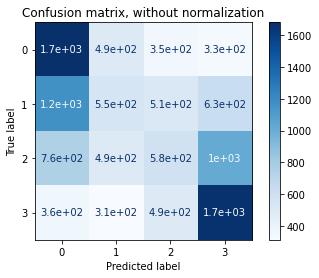

<Figure size 576x576 with 0 Axes>

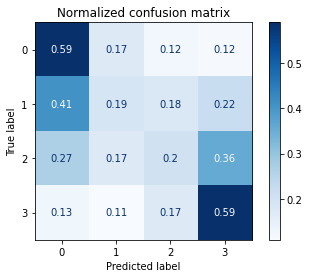

<Figure size 576x576 with 0 Axes>

In [ ]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_ordinal, X_test_quartil, y_test_quartil,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize )
    disp.ax_.set_title(title)
    plt.figure(figsize=(8,8))
    print(title)
    print(disp.confusion_matrix)


In [ ]:
clf_ordinal.best_estimator_['xgboost'].feature_importances_.shape

(15,)

In [ ]:
feature_importances_ordinal = clf_ordinal.best_estimator_['xgboost'].feature_importances_.reshape((15,1))
df_importance_ordinal = pd.DataFrame(data=feature_importances_ordinal,index=X_train_quartil.columns)

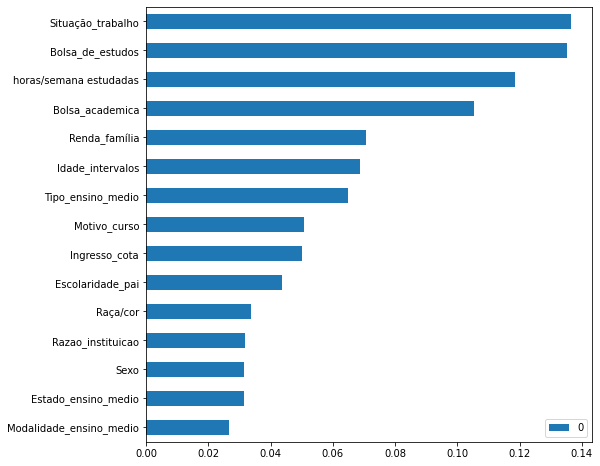

In [ ]:
df_importance_ordinal.sort_values(by=0).plot.barh(figsize=(8,8))

### 25% piores

#### Analise de features selection

In [ ]:
# Selação de colunas para target tranformado pelos 25% piores notas 75% melhores 

pipe = Pipeline([('ordinalencoder',OrdinalEncoder()),
  ('xgboost',XGBClassifier(n_estimators=200,n_jobs=-1,tree_method='hist'))])

In [ ]:
pipe.fit(X_train, y_train_25_menores)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               tree_method='hist', verbosity=1))],
         verbose=False)

In [ ]:
pipe['xgboost'].get_booster().feature_names = list(X_train.columns)

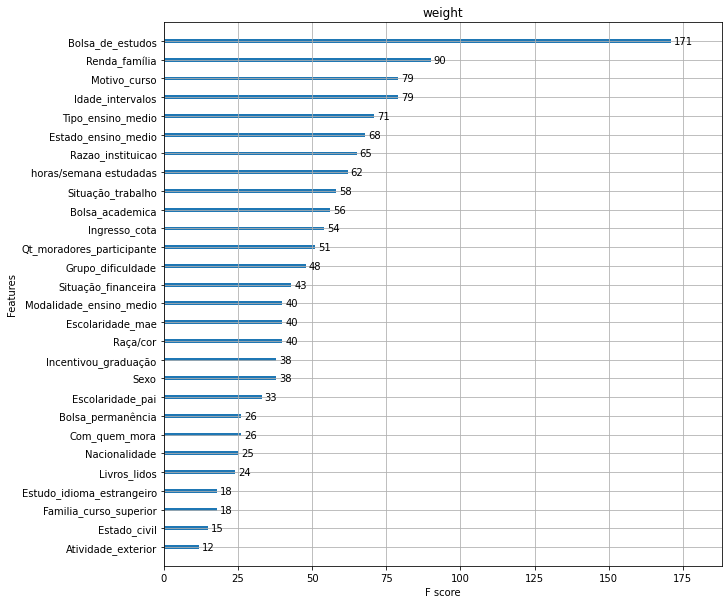

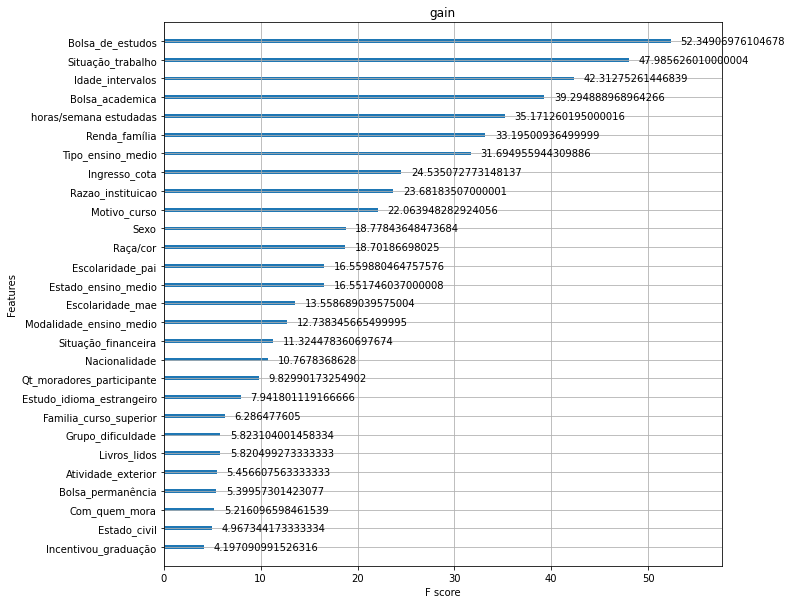

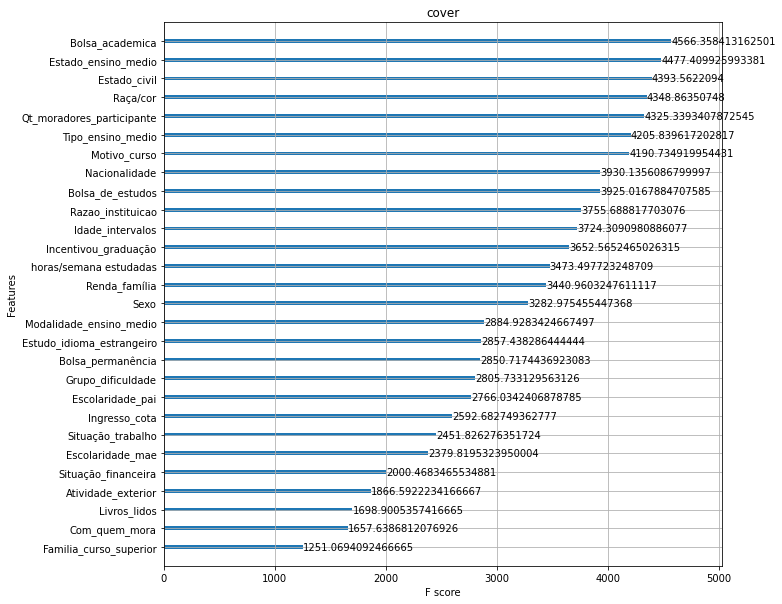

In [ ]:
for i in ["weight", "gain", "cover"]:
  ax = plot_importance(pipe['xgboost'],importance_type=i,title=i)
  #ax.set_yticklabels(pipe['xgboost'].feature_names)
  fig = ax.figure
  
  fig.set_size_inches(10, 10)

#### Execução Ordinal Encoder

In [ ]:
X_train_25_menores = X_train[['Bolsa_de_estudos','Situação_trabalho','Idade_intervalos','Bolsa_academica',
'horas/semana estudadas', 'Renda_família','Tipo_ensino_medio','Ingresso_cota',
'Razao_instituicao','Motivo_curso','Sexo','Raça/cor','Escolaridade_pai',
'Estado_ensino_medio','Escolaridade_mae']]

In [ ]:
X_test_25_menores = X_test[['Bolsa_de_estudos','Situação_trabalho','Idade_intervalos','Bolsa_academica',
'horas/semana estudadas', 'Renda_família','Tipo_ensino_medio','Ingresso_cota',
'Razao_instituicao','Motivo_curso','Sexo','Raça/cor','Escolaridade_pai',
'Estado_ensino_medio','Escolaridade_mae']]

In [ ]:
print(X_train_25_menores.shape, X_test_25_menores.shape)

(45600, 15) (11400, 15)


In [ ]:
y_train_25_menores.value_counts()

1    34081
0    11519
Name: Nota, dtype: int64

In [ ]:
pipe_ordinal = Pipeline([('under',RandomUnderSampler(sampling_strategy='majority')),
                         ('ordinalencoder',OrdinalEncoder()),
                         ('xgboost',XGBClassifier(tree_method='gpu_hist'))])

In [ ]:
parameters = {
    'xgboost__n_estimators': [150,200,250,300],
    'xgboost__learning_rate': [0.001, 0.01, 0.1],
    'xgboost__gamma': [0, 0.5, 1],
    'xgboost__reg_alpha': [0, 0.5, 1],
    'xgboost__reg_lambda': [0.5, 1, 5],
    'xgboost__base_score': [0.2, 0.5, 1],
    'xgboost__max_depth' : [3,4,5,6,7]
}

#fit_params = {"xgboost__eval_set": [(X_val, y_val)], 
 #             "xgboost__early_stopping_rounds": 5, 
  #            "xgboost__verbose": False} 

clf_ordinal = RandomizedSearchCV(pipe_ordinal,n_iter=500,param_distributions=parameters, n_jobs=-1, cv=3, pre_dispatch = 10,scoring=[
  "accuracy",
  "f1_macro",
  "precision_macro",
  "recall_macro"                                                   
],
refit = "f1_macro",verbose=1,random_state=0)

clf_ordinal.fit(X_train_25_menores, y_train_25_menores)# **fit_params=fit_params)

resultados_randomizedsearch_25_menores = pd.DataFrame(clf_ordinal.cv_results_)

resultados_randomizedsearch_25_menores.to_csv('resultados_randomizedsearch_XGBoost_25_menores.csv',index=False)
files.download('resultados_randomizedsearch_XGBoost_25_menores.csv') 

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 32.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pred_ordinal =clf_ordinal.predict(X_test_25_menores)

In [ ]:
clf_ordinal.score(X_test_25_menores,y_test_25_menores)

0.6121900073540785

In [ ]:
accuracy_score(pred_ordinal,y_test_25_menores)

0.6448245614035087

In [ ]:
print(classification_report(y_test_25_menores, pred_ordinal))

              precision    recall  f1-score   support

           0       0.39      0.71      0.50      2859
           1       0.86      0.62      0.72      8541

    accuracy                           0.64     11400
   macro avg       0.63      0.67      0.61     11400
weighted avg       0.74      0.64      0.67     11400



In [ ]:
clf_ordinal.best_params_

{'xgboost__base_score': 0.2,
 'xgboost__gamma': 1,
 'xgboost__learning_rate': 0.1,
 'xgboost__max_depth': 3,
 'xgboost__n_estimators': 300,
 'xgboost__reg_alpha': 1,
 'xgboost__reg_lambda': 5}

Confusion matrix, without normalization
[[2022  837]
 [3212 5329]]
Normalized confusion matrix
[[0.70724029 0.29275971]
 [0.37606838 0.62393162]]


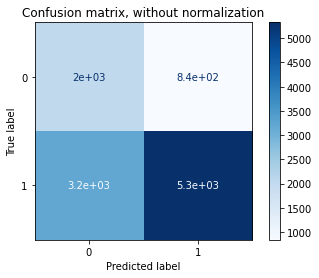

<Figure size 576x576 with 0 Axes>

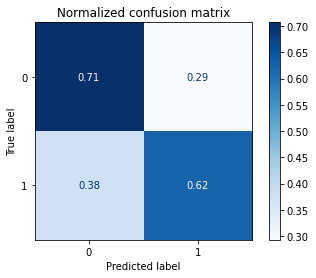

<Figure size 576x576 with 0 Axes>

In [ ]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_ordinal, X_test_25_menores, y_test_25_menores,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize )
    disp.ax_.set_title(title)
    plt.figure(figsize=(8,8))
    print(title)
    print(disp.confusion_matrix)


In [ ]:
clf_ordinal.best_estimator_['xgboost'].feature_importances_.shape

(15,)

In [ ]:
feature_importances_ordinal = clf_ordinal.best_estimator_['xgboost'].feature_importances_.reshape((15,1))
df_importance_ordinal = pd.DataFrame(data=feature_importances_ordinal,index=X_train_25_menores.columns)

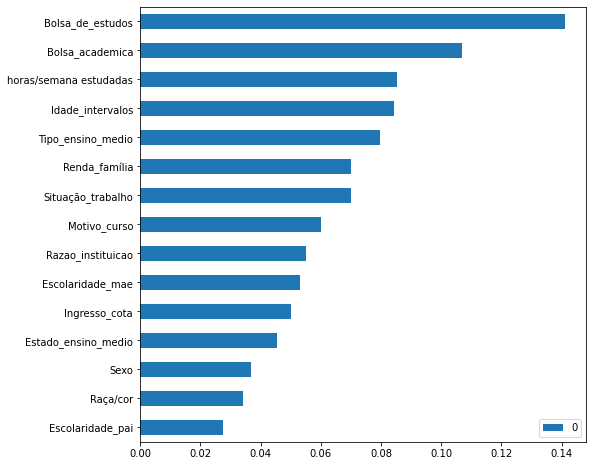

In [ ]:
df_importance_ordinal.sort_values(by=0).plot.barh(figsize=(8,8))

### 25% melhores

#### Analise de features selection

In [ ]:
# Selação de colunas para target tranformado pelos 25% maiores notas 75% menores 

pipe = Pipeline([('ordinalencoder',OrdinalEncoder()),
  ('xgboost',XGBClassifier(n_estimators=200,n_jobs=-1,tree_method='hist'))])

In [ ]:
pipe.fit(X_train, y_train_25_maiores)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=-1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               tree_method='hist', verbosity=1))],
         verbose=False)

In [ ]:
pipe['xgboost'].get_booster().feature_names = list(X_train.columns)

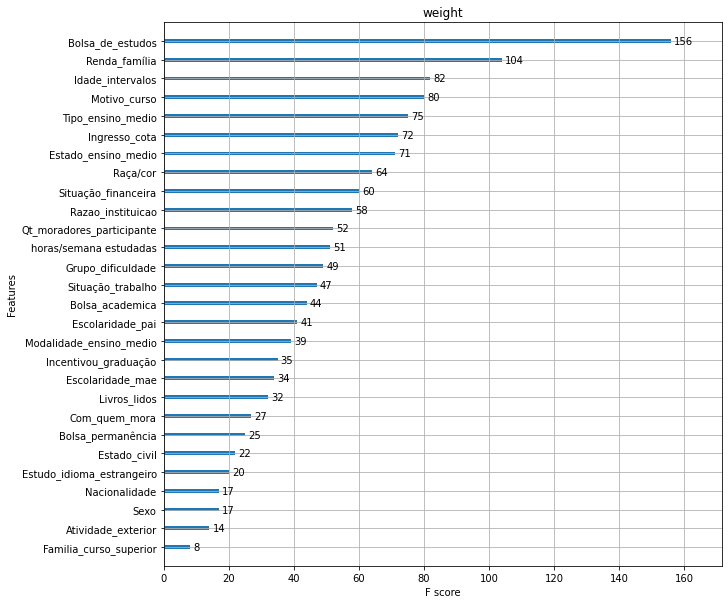

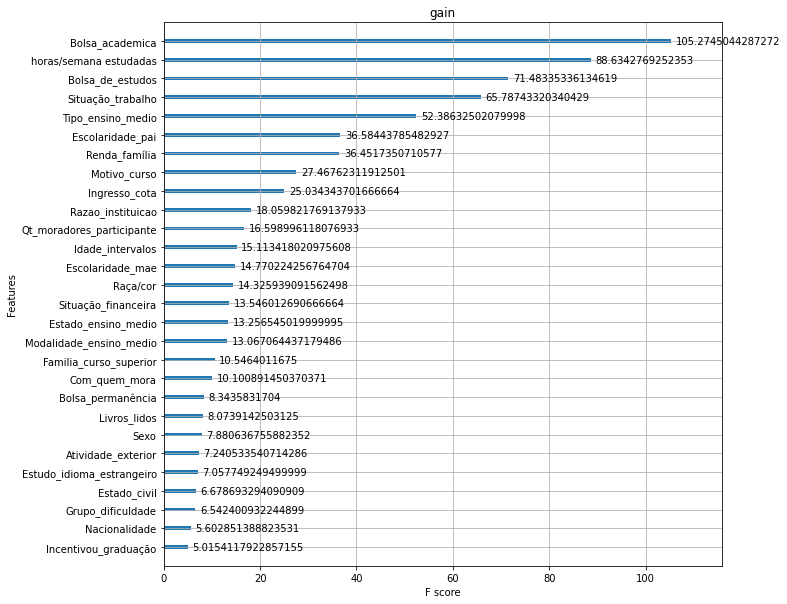

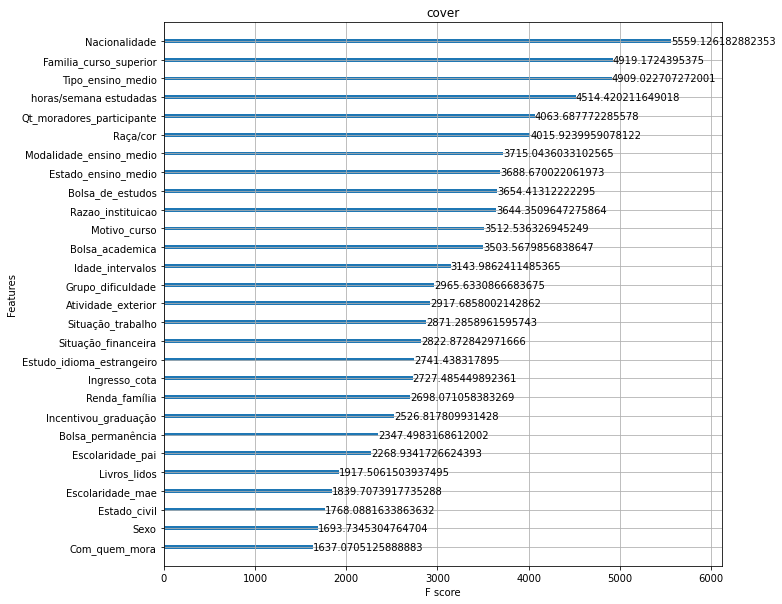

In [ ]:
for i in ["weight", "gain", "cover"]:
  ax = plot_importance(pipe['xgboost'],importance_type=i,title=i)
  #ax.set_yticklabels(pipe['xgboost'].feature_names)
  fig = ax.figure
  
  fig.set_size_inches(10, 10)

##### Execução Ordinal Encoder

In [ ]:
X_train_25_maiores = X_train[['Bolsa_academica','horas/semana estudadas','Bolsa_de_estudos','Situação_trabalho',
'Tipo_ensino_medio','Escolaridade_pai','Renda_família','Motivo_curso',
'Ingresso_cota','Razao_instituicao','Qt_moradores_participante','Idade_intervalos',
'Escolaridade_mae','Raça/cor','Situação_financeira']]

In [ ]:
X_test_25_maiores = X_test[['Bolsa_academica','horas/semana estudadas','Bolsa_de_estudos','Situação_trabalho',
'Tipo_ensino_medio','Escolaridade_pai','Renda_família','Motivo_curso',
'Ingresso_cota','Razao_instituicao','Qt_moradores_participante','Idade_intervalos',
'Escolaridade_mae','Raça/cor','Situação_financeira']]

In [ ]:
print(X_train_25_maiores.shape, X_test_25_maiores.shape)

(45600, 15) (11400, 15)


In [ ]:
y_train_25_maiores.value_counts()

0    34251
1    11349
Name: Nota, dtype: int64

In [ ]:
pipe_ordinal = Pipeline([('under',RandomUnderSampler(sampling_strategy='majority')),
                         ('ordinalencoder',OrdinalEncoder()),
                         ('xgboost',XGBClassifier(tree_method='gpu_hist'))])

In [ ]:
parameters = {
    'xgboost__n_estimators': [150,200,250,300],
    'xgboost__learning_rate': [0.001, 0.01, 0.1],
    'xgboost__gamma': [0, 0.5, 1],
    'xgboost__reg_alpha': [0, 0.5, 1],
    'xgboost__reg_lambda': [0.5, 1, 5],
    'xgboost__base_score': [0.2, 0.5, 1],
    'xgboost__max_depth' : [3,4,5,6,7]
}

#fit_params = {"xgboost__eval_set": [(X_val, y_val)], 
 #             "xgboost__early_stopping_rounds": 5, 
  #            "xgboost__verbose": False} 

clf_ordinal = RandomizedSearchCV(pipe_ordinal,n_iter=500,param_distributions=parameters, n_jobs=-1, cv=3, pre_dispatch = 10,scoring=[
  "accuracy",
  "f1_macro",
  "precision_macro",
  "recall_macro"                                                   
],
refit = "f1_macro",verbose=1,random_state=0)

clf_ordinal.fit(X_train_25_maiores, y_train_25_maiores)# **fit_params=fit_params)

resultados_randomizedsearch_25_maiores = pd.DataFrame(clf_ordinal.cv_results_)

resultados_randomizedsearch_25_maiores.to_csv('resultados_randomizedsearch_XGBoost_25_maiores.csv',index=False)
files.download('resultados_randomizedsearch_XGBoost_25_maiores.csv') 

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 790 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 32.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pred_ordinal =clf_ordinal.predict(X_test_25_maiores)

In [ ]:
clf_ordinal.score(X_test_25_maiores,y_test_25_maiores)

0.6609535900691212

In [ ]:
accuracy_score(pred_ordinal,y_test_25_maiores)

0.7336842105263158

In [ ]:
print(classification_report(y_test_25_maiores, pred_ordinal))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8564
           1       0.47      0.54      0.50      2836

    accuracy                           0.73     11400
   macro avg       0.66      0.67      0.66     11400
weighted avg       0.75      0.73      0.74     11400



In [ ]:
clf_ordinal.best_params_

{'xgboost__base_score': 0.2,
 'xgboost__gamma': 0.5,
 'xgboost__learning_rate': 0.01,
 'xgboost__max_depth': 7,
 'xgboost__n_estimators': 150,
 'xgboost__reg_alpha': 0.5,
 'xgboost__reg_lambda': 0.5}

Confusion matrix, without normalization
[[6822 1742]
 [1294 1542]]
Normalized confusion matrix
[[0.79659038 0.20340962]
 [0.45627645 0.54372355]]


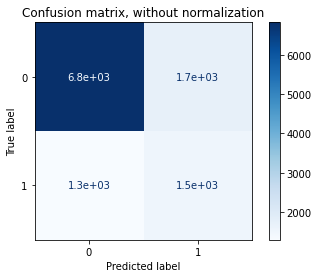

<Figure size 576x576 with 0 Axes>

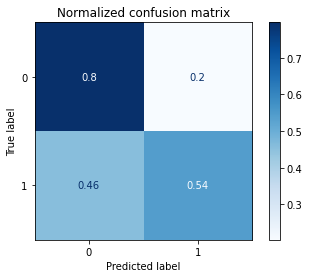

<Figure size 576x576 with 0 Axes>

In [ ]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_ordinal, X_test_25_maiores, y_test_25_maiores,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    plt.figure(figsize=(8,8))
    print(title)
    print(disp.confusion_matrix)

In [ ]:
clf_ordinal.best_estimator_['xgboost'].feature_importances_.shape

(15,)

In [ ]:
feature_importances_ordinal = clf_ordinal.best_estimator_['xgboost'].feature_importances_.reshape((15,1))
df_importance_ordinal = pd.DataFrame(data=feature_importances_ordinal,index=X_train_25_maiores.columns)

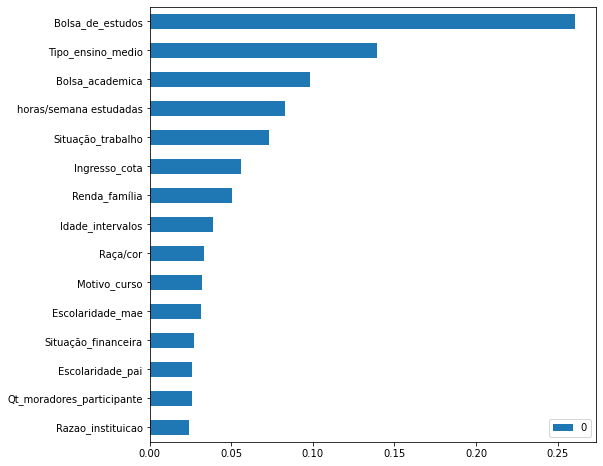

In [ ]:
df_importance_ordinal.sort_values(by=0).plot.barh(figsize=(8,8))